**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> NUM: Téma 6 - Lineárne systémy I. </font>** 

Nazývané tiež ako numerická kvadratúra. 

<a id=table_of_contents></a>
##  Obsah
* [Úvod](#uvod) 


* [Gaussova eliminačná metóda](#gemz) 


* [Výber hlavného prvku](#vyber_hlavneho_prvku) 


* [Vplyv zaokrúhľovacích chýb](#zaokruhlovacie_chyby) 


* [Podmienenosť](#podmienenost) 


* [Použité zdroje](#zdroje) 


**Pre návrat na obsah stlačte klávesu <font color=brown>Home</font>.**

In [1]:
# nacitanie potrebnych balikov v Python-e 
import math 
import numpy as np 
import sympy as sym 
import scipy as sci 
from decimal import Decimal
from matplotlib import pyplot as plt

***
<a id=uvod></a>
 # <font color=brown> Úvod</font> 

Jedna z najčastejšie sa vyskytujúcich úloh vo výpočtovej praxi je úloha vyriešiť sústavu resp. systém lineárnych rovníc (SLR) - rôzne typy modelovania vedú práve na riešenie SLR. Takéto SLR bývajú veľakrát veľmi rozsiahle (veľa rovníc, veľa premenných), no súčasná výpočtová technika a matematické metódy umožňujú v prijateľnom čase vyriešiť sústavu s niekoľkými miliónmi premenných (neznámych). Metódy riešenia SLR sa delia na **_priame_** a **_iteračné_**. 

**Priame metódy** - v konečnom počte krokov nájdu presné riešenie za predpokladu, že výpočet prebieha bez zaokrúhľovacích chýb. 

**Iteračné metódy** - po konečnom počte krokov poskytnú približné riešenie, čo je v poriadku, pokiaľ je dostatočne dobrou aproximáciou presného riešenia. Počet krokov iteračnej metódy závisí od požadovanej presnosti. 

Budeme sa teda zaoberať riešením SLR 

\begin{align*}\label{eq:Form1SLE} \tag{1}
a_{11}x_1+a_{12}x_2+\ldots+a_{1n}x_n=b_1 \\ 
a_{21}x_1+a_{22}x_2+\ldots+a_{2n}x_n=b_2 \\ 
\vdots \qquad \qquad \qquad \qquad \qquad \vdots \\ 
a_{n1}x_1+a_{n2}x_2+\ldots+a_{nn}x_n=b_n.
\end{align*} 

Sústavu \eqref{eq:Form1SLE} je možné zapísať aj v tvare 

\begin{align*}\label{eq:Form2SLE} \tag{2}
\displaystyle\sum\limits_{j=1}^{n}a_{ij}x_j=b_i, \quad i=1,2,\ldots,n,
\end{align*} 

alebo tiež v maticovom tvare 

\begin{align*}\label{eq:Form3SLE} \tag{3}
\mathbf{A}\mathbf{x}=\mathbf{b},
\end{align*}

kde 

\begin{equation*}
\mathbf{A}=\begin{pmatrix}a_{11}&a_{12}&\ldots&a_{1n}\\a_{21}&a_{22}&\ldots&a_{2n}\\\vdots&\vdots&\vdots&\vdots\\a_{n1}&a_{n2}&\ldots&a_{nn}\end{pmatrix}, \quad \mathbf{x}=\begin{pmatrix}x_1\\x_2\\\vdots\\x_n\end{pmatrix}, \quad \mathbf{b}=\begin{pmatrix}b_1\\b_2\\\vdots\\b_n\end{pmatrix}.
\end{equation*} 

Matica $\mathbf{A}$ sa nazýva **_matica sústavy_**, niekedy tiež **_matica koeficientov sústavy_**, $\mathbf{b}$ je  **_vektor pravých strán_** a $\mathbf{x}$ je **_vektor neznámych_** resp. **_premenných_**. 

**V tejto téme sa budeme venovať priamym metódam na riešenie SLR.** 

Štandardne budeme predpokladať, že prvky matíc a vektorov sú reálne čísla, t. j. $\mathbf{A}\in\mathbb{R}^{n\times n}$ (vektorový priestor reálnych matíc rozmerov $n\times n$), $\mathbf{b}\in\mathbb{R}^n$ (vektorový priestor usporiadaných $n$-tíc reálnych čísel). Podobne by sme mohli uvažovať aj matice a vektory nad poľom komplexných čísel, tzn. $\mathbf{A}\in\mathbb{C}^{n\times n}$ a $\mathbf{b}\in\mathbb{C}^n$. 

***
<a id=gemz></a>
 # <font color=brown> Gaussova eliminačná metóda </font> 

## Základný algoritmus 

Základnou priamou metódou na riešenie SLR je dobre známa **_Gaussova eliminačná metóda_** (GEM), ktorá ma niekedy prívlastok "naivná". Skladá sa z dvoch častí. V tzv. **_priamom chode_** resp. **_doprednom móde_** sa sústava $(1)$ prevedie (elementárnymi  riadkovými úpravami) na ekvivalentnú sústavu 

\begin{align*}\label{eq:GaussFwd1} \tag{4}
\mathbf{U}\mathbf{x}=\mathbf{c},
\end{align*} 

kde $\mathbf{U}$ je tzv. **_horná trojuholníková matica_**, čo je vlastne matica, ktorá má pod hlavnou diagonálou všetky prvky nulové, tzn. $\mathbf{U}=\left\{u_{ij}\right\}_{i,j=1}^{n}$ a $u_{ij}=0$ pre $i>j$, 

$$\mathbf{U}=\begin{pmatrix}u_{11}&u_{12}&u_{13}&\ldots&u_{1,n-1}&u_{1n}\\
0&u_{22}&u_{23}&\ldots&u_{2,n-1}&u_{2n}\\ 
0&0&u_{33}&\ldots&u_{3,n-1}&u_{3n}\\ 
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\ 
0&0&\ldots&0&u_{n-1,n-1}&u_{n-1,n}\\ 
0&0&0&\ldots&0&u_{nn} 
\end{pmatrix}.$$ 

V **_spätnom chode_** resp. **_spätnom móde_** sa potom rieší sústava \eqref{eq:GaussFwd1}. Keďže $\mathbf{A}$ je podľa predpokladu regulárna, tak $U$ je tiež regulárna, čo znamená, že diagonálne prvky $u_{ii}\neq0$, $i=1,2,\ldots,n$. Vďaka tomu sa vyjadrí z poslednej rovnice $x_n$, z predposlednej rovnice sa vyjadrí $x_{n-1}$ atď., až na záver sa z prvej rovnice vypočíta $x_1$. 

**_Dolná trojuholníková matica_** - má všetky prvky nad hlavnou diagonálou nulové. 

**Priamy chod GEM.** Pre uľahčenie popisu priameho chodu GEM položíme $\mathbf{A}^{(0)}=\mathbf{A}$, $\mathbf{b}^{(0)}=\mathbf{b}$, prvok matice $\mathbf{A}^{(0)}$ označíme $a_{ij}^{(0)}\equiv a_{ij}$ a prvky vektora $\mathbf{b}^{(0)}$ označíme $b_{i}^{(0)}\equiv b_i$. **Priamy chod GEM (základná/naivná, bez výberu hlavného prvku - pivota) popisuje nasledujúci pseudokód:**

In [ ]:
# algoritmus GEMz (zakladny/naivny - bez vyberu pivota, priamy chod) 
# vstup: A, b 
for k := 1 to n-1: 
    A^{(k)} := A^{(k-1)}; b^{(k)} := b^{(k-1)}; 
        for i := k+1 to n: 
            m_{ik} := a_{ik}^{(k)} / a_{kk}^{(k)}; 
                for j := k+1 to n: 
                    a_{ij}^{(k)} := a_{ij}^{(k)} - m_{ik}a_{kj}^{(k)}; 
            b_{i}^{(k)} := b_{i}^{(k)} - m_{ik}b_{k}^{(k)}; 
# vystup: A^{(n-1)}, b^{(n-1)} 

In [ ]:
# algoritmus GEMz (zakladny/naivny - bez vyberu pivota, spatny chod)
# vstup: A^{(n-1)}, b^{(n-1)} - t. j. vystupy z predosleho algoritmu (vystupy z doprednej fazy) 
x_n := b_n / a_{nn} 
for k := n-1 to 1: 
    x_k := (b_k - sum(j=k+1, n, a_{kj} * x_j)) / a_{kk}
# vystup: x, riesenie SLR Ax=b

<ins> Poznámka ku pseudokódu</ins>: výraz `A^{(k)}` v pseudokóde reprezentuje vlastne $\mathbf{A}^{(k)}$ a podobne výraz `m_{ik}` znamená v podstate $m_{ik}$. Analogicky teda výraz `a_{ik}^{(k)}` čítame ako $a_{ik}^{(k)}$. Ďalej napr. `x_n` značí $x_n$ a `sum(j=k+1, n, a_{kj} * x_j)` znamená $\displaystyle\sum\limits_{j=k+1}^{n}a_{kj}x_j$. 

Priamy chod má $n-1$ krokov. V $k$-tom kroku sa sústava rovníc $\mathbf{A}^{(k-1)}\mathbf{x}=\mathbf{b}^{(k-1)}$ transformuje na sústavu $\mathbf{A}^{(k)}\mathbf{x}=\mathbf{b}^{(k)}$. Prvých $k$ rovníc sa už nemení. Táto skutočnosť je v algoritme vyjadrená príkazom $\mathbf{A}^{(k)} := \mathbf{A}^{(k-1)}$ a $\mathbf{b}^{(k)} := \mathbf{b}^{(k-1)}$. Zmyslom transformácie je vylúčiť neznámu $x_k$ z rovníc $i>k$, t. j. "vynulovať" poddiagonálne koeficienty v $k$-tom stĺpci matice $\mathbf{A}^{(k)}$. To sa dosiahne tak, že od $i$-tej rovnice sa odčíta $m_{ik}$ násobok $k$-tej rovnice. Multiplikátory $m_{ik}$ musia zaistiť, aby na pozícii $[i,k]$ v matici $\mathbf{A}^{(k)}$ vznikla nula: 

$$a_{ik}^{(k)}-m_{ik}a_{kk}^{(k)}=0 \Longrightarrow m_{ik}=a_{ik}^{(k)}/a_{kk}^{(k)}.$$ 

Číslo $a_{kk}^{(k)}$ sa nazýva **_hlavný prvok_** alebo tiež **_pivot_**. Pri výpočte multiplikátora $m_{ik}$ **môže algoritmus GEMz zlyhať** v prípade $a_{kk}^{(k)}=0$. Tomuto problému by sa dalo vyhnúť, keby sa vymenila $k$-ta rovnica s niektorou ďalšou rovnicou, ktorá má pri premennej $x_k$ nenulový koeficient. Postup založený na tejto myšlienke sa nazýva _GEM s výberom hlavného prvku_ a podrobnejšie sa mu budeme venovať v ďalšej časti tohto učebného textu. **GEMz je teda algoritmus bez výberu hlavného pvku.** 

Ďalej budeme v tomto odstavci predpokladať, že $\mathbf{A}$ je taká matica sústavy, ktorá má všetky hlavné prvky $a_{kk}^{(k)}$ nenulové. 

---

#### Poznámka 1 (K programovaniu GEMz)

Prvky matíc $\mathbf{A}^{(k)}$ sa uchovávajú v dvojrozmernom poli povedzme `A` a prvky vektorov $\mathbf{b}^{(k)}$ v jednorozmernom poli povedzme `b`. Príkazy `A^{(k)} := A^{(k-1)}; b^{(k)} := b^{(k-1)}` sa preto v skutočnosti nevykonávajú. Keďže na pozícii `[i,j]` poľa `A` vznikne nula, tak je možné prvok `A[i,k]` využiť pre uloženie multiplikátora $m_{ik}$. 

--- 

--- 

#### <font color=blue> Príklad 1 </font> 

V tomto príklade budeme ilustrovať rôzne možnosti riešenia SLR (zabudované) v Python-e. Využijeme k tomu postupne knižnice *NumPy*, *SciPy* a *SymPy*. 

Budeme riešiť nasledujúce tri rôzne SLR, pričom prvý bude mať práve jedno riešenie (**_konzistentný SLR_**), druhý bude mať prázdnu množinu riešení (**_nekonzistentný SLR_**) a tretí systém bude mať nekonečne veľa riešení (**_závislý SLR_**): 

$$\mathbf{A}_1\mathbf{x}=\mathbf{b}_1,$$

kde 

$$\mathbf{A}_1=\begin{pmatrix}2&-3&1\\1&-1&2\\3&1&-1\end{pmatrix}, \quad \mathbf{x}=\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}, \quad \mathbf{b}_1=\begin{pmatrix}-1\\-3\\9\end{pmatrix};$$


In [17]:
# NumPy

# zavedie sa matica sustavy a vektor pravych stran 
A1 = np.array([[2, -3, 1],
              [1, -1, 2],
              [3, 1, -1]])
print('A1 = ')
print(A1)
print('')
b1 = np.array([-1, -3, 9])
print('b1 = ')
print(b1) 
print('')

# vyriesi sa SLR 
res1a = np.linalg.solve(A1, b1) 
print('x = ')
print(res1a)

A1 = 
[[ 2 -3  1]
 [ 1 -1  2]
 [ 3  1 -1]]

b1 = 
[-1 -3  9]

x = 
[ 2.  1. -2.]


In [18]:
# NumPy riesi SLR Ax=b pomocou inverznej matice 
# tzn. najde sa inverzna matica A^{-1} k matici A sustavy, ak existuje (ak nie vypise sa chybova hlaska "Singular matrix") 
# ak existuje inverzna matica, tak riesenie x sa vyjadri v tvare x=A^{-1}b 

A1_inv = np.linalg.inv(A1) 
print('A1_inv = ')
print(A1_inv)
print('')
res1a_inv =  np.dot(A1_inv,b1) 
print('x = ')
print(res1a_inv)

A1_inv = 
[[ 0.05263158  0.10526316  0.26315789]
 [-0.36842105  0.26315789  0.15789474]
 [-0.21052632  0.57894737 -0.05263158]]

x = 
[ 2.  1. -2.]


In [19]:
# SciPy 
# from scipy.linalg import solve 
res1b = sci.linalg.solve(A1, b1) 
print(res1b)

[ 2.  1. -2.]


In [20]:
# SymPy 

x1, x2, x3 = x = sym.symbols('x1:4') 
print(x)
# definuje sa rozsirena matica sustavy (A1,b1) tzn. matica A1 a k nej "prilepeny" sprava stlpcovy vektor pravych stran b1 
A1 = sym.Matrix(( (2, -3, 1, -1), (1, -1, 2, -3), (3, 1, -1, 9) )) 
print(A1)
res1c = sym.solve_linear_system(A1, *x) 
print(res1c)

# schodovity tvar matice (ang. reduced row-echelon form) 
A1.rref()[0] 

# The algorithm used here is fraction-free Gaussian elimination, which results, after elimination, 
# in an upper-triangular matrix. Then solutions are found using back-substitution. 
# This approach is more efficient and compact than the Gauss-Jordan method

(x1, x2, x3)
Matrix([[2, -3, 1, -1], [1, -1, 2, -3], [3, 1, -1, 9]])
{x1: 2, x2: 1, x3: -2}


Matrix([
[1, 0, 0,  2],
[0, 1, 0,  1],
[0, 0, 1, -2]])

$$\mathbf{A}_2\mathbf{x}=\mathbf{b}_2,$$ 

kde 

$$\mathbf{A}_2=\begin{pmatrix}1&-1&4\\3&&1\\-1&1&-4\end{pmatrix}, \quad \mathbf{x}=\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}, \quad \mathbf{b}_2=\begin{pmatrix}-5\\0\\20\end{pmatrix};$$


In [21]:
# NumPy

# zavedie sa matica sustavy a vektor pravych stran 
A2 = np.array([[1, -1, 4],
              [3, 0, 1],
              [-1, 1, -4]])
print(A2)
print('')
b2 = np.array([-5, 0, 20])
print(b2) 
print('')

# vyriesi sa SLR 
res2a = np.linalg.solve(A2, b2) 
print(res2a)

[[ 1 -1  4]
 [ 3  0  1]
 [-1  1 -4]]

[-5  0 20]



LinAlgError: Singular matrix

In [22]:
# SciPy 
# from scipy.linalg import solve 
res2b = sci.linalg.solve(A2, b2) 
print(res2b)

LinAlgError: Matrix is singular.

In [23]:
# SymPy 

x1, x2, x3 = x = sym.symbols('x1:4') 
print(x)
# definuje sa rozsirena matica sustavy (A1,b1) tzn. matica A1 a k nej "prilepeny" sprava stlpcovy vektor pravych stran b1 
A2 = sym.Matrix(( (1, -1, 4, -5), (3, 0, 1, 0), (-1, 1, -4, 20) )) 
print(A2)
res2c = sym.solve_linear_system(A2, *x) 
print(res2c) 

# schodovity tvar matice (ang. reduced row-echelon form) 
A2.rref()[0]

(x1, x2, x3)
Matrix([[1, -1, 4, -5], [3, 0, 1, 0], [-1, 1, -4, 20]])
None


Matrix([
[1, 0,   1/3, 0],
[0, 1, -11/3, 0],
[0, 0,     0, 1]])

$$\mathbf{A}_3\mathbf{x}=\mathbf{b}_3,$$ 

kde 

$$\mathbf{A}_3=\begin{pmatrix}-1&1&2\\1&2&1\\-2&-1&1\end{pmatrix}, \quad \mathbf{x}=\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}, \quad \mathbf{b}_3=\begin{pmatrix}0\\6\\-6\end{pmatrix}.$$

In [24]:
# NumPy

# zavedie sa matica sustavy a vektor pravych stran 
A3 = np.array([[-1, 1, 2],
              [1, 2, 1],
              [-2, -1, 1]])
print(A3)
print('')
b3 = np.array([0, 6, -6])
print(b3) 
print('')

# vyriesi sa SLR 
res3a = np.linalg.solve(A3, b3) 
print(res3a)

[[-1  1  2]
 [ 1  2  1]
 [-2 -1  1]]

[ 0  6 -6]



LinAlgError: Singular matrix

In [25]:
# SciPy 
# from scipy.linalg import solve 
res3b = sci.linalg.solve(A3, b3) 
print(res3b)

LinAlgError: Matrix is singular.

In [26]:
# SymPy 

x1, x2, x3 = x = sym.symbols('x1:4') 
print(x)
# definuje sa rozsirena matica sustavy (A1,b1) tzn. matica A1 a k nej "prilepeny" sprava stlpcovy vektor pravych stran b1 
A3 = sym.Matrix(( (-1, 1, 2, 0), (1, 2, 1, 6), (-2, -1, 1, -6) )) 
print(A3)
res3c = sym.solve_linear_system(A3, *x) 
print(res3c) # x3 volime ako parameter 

# schodovity tvar matice (ang. reduced row-echelon form) 
A3.rref()[0]

(x1, x2, x3)
Matrix([[-1, 1, 2, 0], [1, 2, 1, 6], [-2, -1, 1, -6]])
{x2: -x3 + 2, x1: x3 + 2}


Matrix([
[1, 0, -1, 2],
[0, 1,  1, 2],
[0, 0,  0, 0]])

Z predchádzajúcich výpočtov v Python-e vyplýva nasledujúca **stratégia riešenia SLR**: Najprv je možné použiť na riešenie zadanej SLR balík *NumPy*. Ak dostaneme jediné riešenie, vec je vybavená. Ak dostaneme chybovú hlášku "Singular matrix", môže to znamenať, že buď SLR nemá riešenie alebo má nekonečne veľa riešení. V tom prípade je vhodné nájsť schodovitý tvar SLR pomocou balíka *SymPy* a pozrieť sa, ako vyzerá posledný riadok v tomto tvare. Z toho už bude jasné, či má SLR prázdnu množinu riešení alebo má nekonečne veľa riešení. 

--- 

## LU rozklad matice

**Po ukončení priameho chodu** je horná trojuholníková matica $\mathbf{U}$ v rovnici $(4)$ určená diagonálnymi a naddiagonálnymi prvkami matice $\mathbf{A}^{(n-1)}$, t. j. 

\begin{align*}\label{eq:GaussFwd2} \tag{5}
u_{ij} = \begin{cases}
0, \quad \text{ pre } j=1,2,\ldots,i-1 \\ 
\qquad\qquad\qquad\qquad\qquad\qquad i=1,2,\ldots,n\\ 
a_{ij}^{(n-1)} \text{ pre } j=i,i+1,\ldots,n. 
\end{cases}
\end{align*} 

Ďalej vektor $\mathbf{c}$ v rovnici $(4)$ je transformovaný pravou stranou $\mathbf{b}^{(n-1)}$, t. j. 

\begin{align*}\label{eq:GaussFwd3} \tag{6}
c_i = b_i^{(n-1)}, \quad i=1,2,\ldots,n.
\end{align*} 

Multiplikátory $m_{ij}$ z priameho chodu sú umiestnené do dolnej trojuholníkovej matice 

\begin{align*}\label{eq:GaussFwd4} \tag{7}
\mathbf{L}=\begin{pmatrix}1&0&0&\ldots&0&0\\
m_{21}&1&0&\ldots&0&0\\ 
m_{31}&m_{32}&1&\ldots&0&0\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\ 
m_{n-1,1}&m_{n-1,2}&m_{n-1,3}&\ldots&1&0\\ 
m_{n1}&m_{n2}&m_{n3}&\ldots&m_{n,n-1}&1
\end{pmatrix}.
\end{align*}

--- 

#### <font color=green> Tvrdenie 1 (LU rozklad) </font> 

Ak sú splnené podmienky $(5)$, $(6)$, $(7)$, tak po ukončení priameho chodu GEM platí $\mathbf{A}=\mathbf{L}\mathbf{U}$.  

--- 

---

#### Poznámka 2 

* Vyjadrenie matice $\mathbf{A}$ ako súčinu dolnej trojuholníkovej matice $\mathbf{L}$ a hornej trojuholníkovej matice $\mathbf{U}$, t. j. 
\begin{align*}\label{eq:LUDecomp1} \tag{8}
\mathbf{A}=\mathbf{L}\mathbf{U}
\end{align*}
sa nazýva **_LU rozklad matice_** $\mathbf{A}$. 


* Tento rozklad je možné použiť k neskoršiemu riešeniu sústavy rovníc s rovnakou maticou sústavy $\mathbf{A}$, avšak s inou pravou stranou. To je užitočné najmä vtedy, keď je potrebné riešiť postupnosť úloh $\mathbf{A}\mathbf{x}_i=\mathbf{b}_i$, pričom nová pravá strana $\mathbf{b}_i$ sa môže zostaviť až potom, ako boli vyriešené predchádzajúce sústavy $\mathbf{A}\mathbf{x}_k=\mathbf{b}_k$, $k<i$. 

--- 

--- 

### <font color=green> Veta 1 (Existencia LU rozkladu) </font> 

Nech $\mathbf{A}$ je regulárna $n\times n$ matica. Potom $\mathbf{A}=\mathbf{L}\mathbf{U}$, kde $\mathbf{L}$ je dolná trojuholníkova matica a $\mathbf{U}$ je horná trojuholníková matica, práve vtedy, keď sú všetky vedúce hlavné minory matice $\mathbf{A}$ nenulové. Naviac LU rozklad je určený jednoznačne, pričom matica $\mathbf{L}$ má na hlavnej diagonále jednotky. 

---

Teraz si vysvetlíme, **ako je možné efektívne vyriešiť sústavu v tvare $\mathbf{L}\mathbf{U}\mathbf{x}=\mathbf{b}$**. Keď označíme $\mathbf{U}\mathbf{x}=\mathbf{y}$, tak vidíme, že $\mathbf{y}$ je riešenie sústavy $\mathbf{L}\mathbf{y}=\mathbf{b}$. Určíme teda najprv $\mathbf{y}$ ako riešenie sústavy $\mathbf{L}\mathbf{y}=\mathbf{b}$ a potom určíme $\mathbf{x}$ ako riešenie sústavy $\mathbf{U}\mathbf{x}=\mathbf{y}$, t. j. 

\begin{align*}\label{eq:LUDecomp2} \tag{9}
\mathbf{L}\mathbf{y}=\mathbf{b}, \quad \mathbf{U}\mathbf{x}=\mathbf{y}. 
\end{align*} 

Zrejme $\mathbf{y}=\mathbf{b}^{(n-1)}$ je transformovaná pravá strana získaná algoritmom GEMz. 

Sústava $\mathbf{L}\mathbf{y}=\mathbf{b}$ je ľahko riešiteľná, keďže stačí z prvej rovnice vyjadriť $y_1$, z druhej rovnice vyjadriť $y_2$ atď. až na koniec z poslednej rovnice sa vypočíta $y_n$. Sústava $\mathbf{U}\mathbf{x}=\mathbf{y}$ sa vyrieši tzv. spätným vyjadrovaním resp. od konca, tzn., že z poslednej rovnice sa vyjadrí $x_n$, z predposlednej rovnice sa vyjadrí $x_{n-1}$  a pod. až nakoniec sa z prvej rovnice vypočíta $x_1$. 

---

#### Poznámka 3 

* Pri riešení SLR býva niekedy LU rozklad označovaný ako **eliminácia** alebo **priamy (dopredný) chod** resp. **dopredná eliminácia** a výpočet riešenia podľa vzťahu $(9)$ sa zvykne označovať ako **spätný chod** resp. **spätná substitúcia**. 


* SLR $\mathbf{L}\mathbf{x}=\mathbf{b}$ s dolnou trojuholníkovou maticou sústavy $\mathbf{L}$ je možné riešiť tzv. **doprednou substitúciou** (vyžadujúcou $n^2+3n-4$ operácií) 

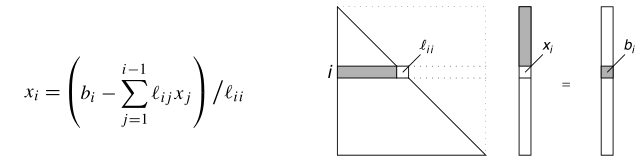 
$$\text{Zdroj: Gilli et al. (2019).}$$


* SLR $\mathbf{U}\mathbf{x}=\mathbf{b}$ s hornou trojuholníkovou maticou sústavy $\mathbf{U}$ je možné riešiť tzv. **spätnou  substitúciou** (vyžadujúcou $n^2+3n-4$ operácií)

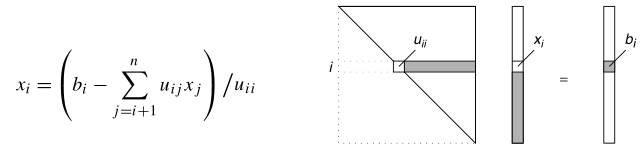
$$\text{Zdroj: Gilli et al. (2019).}$$


* Riešenie (popísané vyššie v texte) SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$, kde $\mathbf{A}=\mathbf{L}\mathbf{U}$ je LU rozklad matice $\mathbf{A}$ schématicky znázorňuje nasledovný obrázok. 

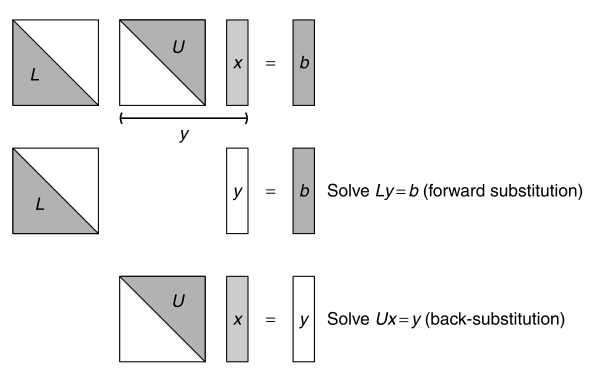 
$$\text{Zdroj: Gilli et al. (2019).}$$

--- 

--- 

#### <font color=blue> Príklad 2 </font> 

Teraz si ukážeme ako nájsť LU rozklad matice $\mathbf{A}$ pomocou Python-u a ako pomocou neho vyriešiť SLR. Budeme uvažovať SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$, kde $\mathbf{A}=\begin{pmatrix}2&-3&1\\1&-1&2\\3&1&-1\end{pmatrix}, \quad \mathbf{x}=\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}, \quad \mathbf{b}=\begin{pmatrix}-1\\-3\\9\end{pmatrix}$. 


In [29]:
# NumPy

A = np.array([[2, -3, 1],
              [1, -1, 2],
              [3, 1, -1]])
print('A = ')
print(A)
print('')

# LU dekompozicia - SciPy 
# from scipy.linalg import lu
L, U = sci.linalg.lu(A, permute_l=True) 
print('LU = ')
print(L @  U) # kontrola 
print('') 
print('LU = ')
print(np.dot(L,U)) # kontrola 

A = 
[[ 2 -3  1]
 [ 1 -1  2]
 [ 3  1 -1]]

LU = 
[[ 2. -3.  1.]
 [ 1. -1.  2.]
 [ 3.  1. -1.]]

LU = 
[[ 2. -3.  1.]
 [ 1. -1.  2.]
 [ 3.  1. -1.]]


In [30]:
# SymPy 

x1, x2, x3 = x = sym.symbols('x1:4') 
print(x)
# definuje sa rozsirena matica sustavy (A,b) tzn. matica A a k nej "prilepeny" sprava stlpcovy vektor pravych stran b 
A = sym.Matrix(( (2, -3, 1, -1), (1, -1, 2, -3), (3, 1, -1, 9) )) 
print(A)
# riesenie SLR pomocou LU rozkladu 
res = sym.solve_linear_system_LU(A, x) 
print(res)

(x1, x2, x3)
Matrix([[2, -3, 1, -1], [1, -1, 2, -3], [3, 1, -1, 9]])
{x1: 2, x2: 1, x3: -2}


--- 

## Kedy je možné aplikovať algoritmus GEMz?

Ako už bolo naznačené skôr, slabinou algoritmu GEMz môže byť výpočet multiplikátora $m_{ik}$, lebo vo všeobecnosti nemožno vylúčiť, že v priebehu eliminácie vznikne $a_{kk}^{(k)}=0$. V aplikáciách sa pomerne často riešeia SLR, kde nulový pivot v algoritme GEMz vzniknúť nemôže. Aby sme takéto sústavy mohli popísať, zavedieme/pripomenieme niekoľko pojmov. 

---

### <font color=red> Definícia 1 </font> 

Hovoríme, že matica $\mathbf{A}=\left\{a_{ij}\right\}_{i,j=1}^{n}$ je **_riadkovo_** resp. **_stĺpcovo_** **_rýdzo (striktne) diagonálne dominantná_**, ak platí 

\begin{align*}\label{eq:RowStrictDiagDomin} \tag{10a}
|a_{ii}| > \displaystyle\sum\limits_{j=1\\j\neq i}^{n}|a_{ij}|, \quad i=1,2,\ldots,n.  
\end{align*} 

resp.

\begin{align*}\label{eq:ColStrictDiagDomin} \tag{10b}
|a_{ii}| > \displaystyle\sum\limits_{i=1\\i\neq j}^{n}|a_{ij}|, \quad i=1,2,\ldots,n.  
\end{align*} 

--- 

---

#### Poznámka 4 

* Definícia 1 vlastne hovorí, že v každom riadku resp. stĺpci je absolútna hodnota diagonálneho prvku väčšia než súčet absolútnych hodnôt zvyšných prvkov v danom riadku resp. stĺpci.  


* Aj keď matica $\mathbf{A}$ sústavy rovníc $\mathbf{A}\mathbf{x}=\mathbf{b}$ nie je diagonálne dominantná, niekedy je možné vhodným "preskladaním" rovníc docieliť to, že nová matica $\hat{\mathbf{A}}$ takto vzniknutej ekvivalentnej sústavy rovníc $\hat{\mathbf{A}}\mathbf{x}=\hat{\mathbf{b}}$ už diagonálne dominantná bude. 

--- 

---

####  <font color=blue> Príklad 3 </font> 

Určte, či sú matice $\mathbf{A}$, $\mathbf{B}$ stĺpcovo striktne diagonálne dominantné. 

$$\mathbf{A}=\begin{pmatrix}3&1&-1\\2&-5&2\\1&6&8\end{pmatrix}, \qquad \mathbf{B}=\begin{pmatrix}3&2&6\\1&8&1\\9&2&-2\end{pmatrix}.$$

<ins> Riešenie: </ins>

Matica $\mathbf{A}$ je stĺpcovo striktne diagonálne dominantná, lebo platí $|3|>|1|+|-1|$, $|-5|>|2|+|2|$ a $|8|>|1|+|6|$. 

Matica $\mathbf{B}$ nie je stĺpcovo striktne diagonálne dominantná, lebo napr. neplatí $|3|>|2|+|6|$. Keď ale vymeníme prvý a tretí riadok matice $\mathbf{B}$, tak potom bude matica $\mathbf{B}$ stĺpcovo striktne diagonálne dominantná. 

--- 

---

### <font color=red> Definícia 2 </font> 

Matica $\mathbf{A}=\left\{a_{ij}\right\}_{i,j=1}^{n}$ sa nazýva **_pozitívne definitná_**, ak pre každý nenulový vektor $\mathbf{x}=(x_1,\ldots,x_n)'$ platí 

\begin{align*}\label{eq:PositiveDefinitMatrix} \tag{11}
\mathbf{x}'\mathbf{A}\mathbf{x} = \displaystyle\sum\limits_{i,j=1}^{n}x_ia_{ij}x_j>0.  
\end{align*}

--- 

---

#### Poznámka 5 

* Overiť podmienku $(11)$ nie je vôbec jednoduché. Pokiaľ je ale matica $\mathbf{A}$ regulárna, tak z $(11)$ hneď vyplýva, že matica $\mathbf{A}'\mathbf{A}$ je pozitívne definitná (p.d.). 


* Po vynásobení sústavy $\mathbf{A}\mathbf{x}=\mathbf{b}$ maticou $\mathbf{A}'$ zľava, vznikne ekvivalentná sústava $\mathbf{A}'\mathbf{A}\mathbf{x}=\mathbf{A}'\mathbf{b}$ s p.d. maticou sústavy . Tento postup sa však pre praktické účely príliš nehodí, lebo operácia $\mathbf{A}'\mathbf{A}$ si vyžaduje veľa výpočtov a pri iteračných metódach výrazne klesá rýchlosť konvergencie. 


* Ak to nebude uvedené ináč, tak pri riešení SLR **budeme o p.d. matici predpokladať navyše to, že je symetrická**.


* Existuje niekoľko ekvivalentných charakterizácií pozitívnej definitnosti matice (pozri napr. [tu](https://cs.wikipedia.org/wiki/Pozitivn%C4%9B_definitn%C3%AD_matice)). 


* Na **generovanie symetrických p.d. matíc** v Python-e, je možné využiť nasledujúcu funkciu: 

In [8]:
from sklearn.datasets import make_spd_matrix 

In [9]:
make_spd_matrix(4)

array([[ 0.97367821,  1.01009372, -0.56417325,  0.27029141],
       [ 1.01009372,  2.667387  , -1.29103899,  1.35077973],
       [-0.56417325, -1.29103899,  1.55615535, -0.70077084],
       [ 0.27029141,  1.35077973, -0.70077084,  1.33506506]])

--- 

<font color=orange> Zdôvodnite tvrdenie v prvom bode Poznámky 5. </font> 

Pri riešení konkrétnych úloh v praxi býva obvykle už vopred známe (z povahy riešeného problému a zo spôsobu jeho diskretizácie), či matice vznikajúcich SLR sú alebo nie sú p.d. Napriek tomu uvedieme aspoň jednu užitočnú charakterizáciu (nutnú a postačujúcu podmienku) pozitívnej definitnosti známu ako *Sylvestrovo kritérium*.

--- 

### <font color=green> Veta 2 (Sylvestrovo kritérium) </font> 

Štvorcová symetrická matica $\mathbf{A}=\left\{a_{ij}\right\}_{i,j=1}^{n}$ je pozitívne definitná práve vtedy, keď sú kladné determinanty všetkých hlavných rohových submatíc, t. j. keď platí 

$$a_{11}>0, \quad \begin{vmatrix}a_{11}&a_{12}\\a_{21}&a_{22}\end{vmatrix}>0, \quad \begin{vmatrix}a_{11}&a_{12}&a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\end{vmatrix}>0, \quad \ldots \quad ,\det(\mathbf{A})=\begin{vmatrix}a_{11}&\ldots&a_{1n}\\\vdots&&\vdots\\a_{n1}&\ldots&a_{nn}\end{vmatrix}>0.$$

---

---

#### Poznámka 6 

Dá sa ukázať, že **algoritmus GEMz je možné použiť pre riešenie tých sústav, ktorých matica koeficientov je buď rýdzo diagonálne dominantná alebo pozitívne definitná**. Úspešné použitie algoritmu GEMz sa dá zaručiť aj pre ďalšie typy matíc, no nebudeme sa nimi v tomto kurze zaoberať. 

--- 

## Výpočtová náročnosť GEMz 

Priamy chod GEM vyžaduje $\dfrac{1}{3}n^3+O\left(n^2\right)$ násobiacich operácií (t.j.násobenie alebo delenie) a tiež $\dfrac{1}{3}n^3+O\left(n^2\right)$ sčítacích operácií (t.j. sčítanie alebo odčítanie). Symbolom $O\left(n^2\right)$ je označený rádovo menej významný počet operácii. Člen $\dfrac{1}{3}n^2$ súvisí s transformáciou matice sústavy. Počet operácií súvisiaci s transformáciou pravej strany je o rád nižší a je teda zahrnutý do člena $O\left(n^2\right)$. 

Spätný chod GEM je výpočtovo podstatne menej naročný. Riešenie sústavy rovníc s trojuholníkovou maticou vyžaduje $\dfrac{1}{2}n^2+O\left(n\right)$ násobiacich operácií a tiež $\dfrac{1}{2}n^2+O\left(n\right)$ sčítacích operácií. "GEM spätný chod", t. j. výpočet $\mathbf{x}$ zo sústavy $(4)$, preto vyžaduje $\dfrac{1}{2}n^2+O\left(n\right)$ operácií a "LU spätný chod", t. j. výpočet $\mathbf{x}$, $\mathbf{y}$ zo sústav $(9)$, vyžaduje dvojnásobný počet operácií, čiže $n^2+O\left(n\right)$. 

Pre veľký počet rovníc, tzn. pre veľké $n$, teda môžeme tvrdiť, že eliminácia potrebuje približne $\dfrac{1}{3}n^3$ operácií a GEM resp. LU spätný chod približne $\dfrac{1}{2}n^2$ resp. $n^2$ operácií (násobiacich a rovnako tak sčítacích) 

## Choleskeho rozklad matice 

--- 

#### <font color=green> Tvrdenie 2 (Choleskeho rozklad) </font> 

Nech $\mathbf{A}$ je reálna symetrická $n\times n$ matica. Potom $\mathbf{A}$ je pozitívne definitná vtedy a len vtedy, keď existuje invertovateľná dolná trojuholníková matica $\mathbf{L}$ taká, že platí 

\begin{align*}\label{eq:CholeskyDecomp1} \tag{12}
\mathbf{A}=\mathbf{L}\mathbf{L}'.  
\end{align*}

Naviac, prvky hlavnej diagonály matice $\mathbf{L}$ je možné zvoliť tak, aby boli všetky kladné. 

---

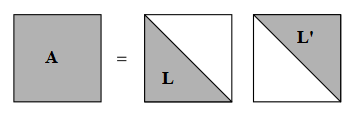 

---

#### Poznámka 7 

* Dekompozícia uvedená v $(12)$ sa nazýva **_Choleskeho rozklad matice_** $\mathbf{A}$ a nenulové prvky dolnej trojuholníkovej matice $\mathbf{L}$ z tohto rozkladu sú postupne pre $k=1,2,\ldots,n$ dané vzťahmi <br/>
<br/>
\begin{align*}\label{eq:CholeskyDecomp2} \tag{13}
l_{kk}&=\sqrt{a_{kk}-\displaystyle\sum\limits_{j=1}^{k-1}l^{2}_{kj}}, \\
\\
l_{ik}&=\dfrac{1}{l_{kk}}\left(a_{ik}-\displaystyle\sum\limits_{j=1}^{k-1}l_{ij}l_{kj}\right), \quad i=k+1,k+2,\ldots,n,
\end{align*} <br/>
pričom $l_{11}=\sqrt{a_{11}}$ a $l_{i1}=a_{i1}/\sqrt{a_{11}}$ pre $i=2,3,\ldots,n$. Všimnime si, že $\mathbf{x}'\mathbf{A}\mathbf{x}>0$ a voľba $\mathbf{x}=\mathbf{e}_j=(0,0,\ldots,0,1,0,\ldots,0)'$ implikuje $a_{jj}>0$, pričom vektor $\mathbf{e}_j$ má na $j$-tej pozícii jednotku a všade inde má nuly. 


* Choleskeho dekompozíciu je možné vnímať ako špeciálny prípad LU rozkladu pre symetrickú a p.d. maticu. 


* **Choleskeho algoritmus $(13)$** sa dá použiť **k efektívnemu posúdeniu pozitívnej definitnosti matice** $\mathbf{A}$: Totiž ak je $\mathbf{A}$ symetrická a zároveň platí $a_{kk}-\displaystyle\sum\limits_{j=1}^{k-1}l_{kj}^2>0$ pre $k=1,2,\ldots,n$, potom $\mathbf{A}$ je p.d. 

--- 

Ak máme k dispozícii Choleskeho rozklad matice $\mathbf{A}$ sústavy $\mathbf{A}\mathbf{x}=\mathbf{b}$, následne je možné SLR riešiť podľa $(9)$, pričom sa vezme $\mathbf{U}=\mathbf{L}'$. Choleskeho rozklad $\mathbf{A}=\mathbf{L}\mathbf{L}'$ vyžaduje približne polovičné výpočtové náklady oproti všeobecnému LU rozkladu, teda približne $\dfrac{1}{6}n^3$ násobiacich operácií a zhruba rovnaký počet sčítacích operácií (výpočet odmocnín nemá na celkový počet operácií významný vplyv). 


--- 

#### <font color=blue> Príklad 4 </font> 

V tomto príklade budeme ilustrovať nájdenie Choleskeho rozkladu matice $\mathbf{A}=\begin{pmatrix}1&3&5\\3&13&23\\5&23&42\end{pmatrix}$ pomocou vstavanej funkcie v Python-e. 

In [65]:
A = np.array([[1,3,5],[3,13,23],[5,23,42]]) 
print('A = ') 
print(A)
print('')

# dolna trojuholnikova matica L z Choleskeho rozkladu matice A 
L = sci.linalg.cholesky(A, lower=True)
print('L = ')
print(L)
print('')
L_transp = L.T
print('L´ = ')
print(L_transp)
print('')
# kontrola 
print('LL´ = ')
print(L @ L_transp) 

A = 
[[ 1  3  5]
 [ 3 13 23]
 [ 5 23 42]]

L = 
[[1. 0. 0.]
 [3. 2. 0.]
 [5. 4. 1.]]

L´ = 
[[1. 3. 5.]
 [0. 2. 4.]
 [0. 0. 1.]]

LL´ = 
[[ 1.  3.  5.]
 [ 3. 13. 23.]
 [ 5. 23. 42.]]


***
<a id=vyber_hlavneho_prvku></a>
 # <font color=brown> Výber hlavného prvku </font> 

Túto časť začneme príkladom, ktorý bude ilustrovať možné problémy s naivnou GEM a zároveň dá opodstatnenie záležitostiam (vylepšeniam), ktoré budeme rozoberať v tomto odseku. 

--- 

#### <font color=blue> Príklad 5 </font>  

Máme vyriešiť SLR 

$$\begin{pmatrix}10&-7&0\\-3&2.099&6\\5&-1.1&4.8\end{pmatrix}\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}=\begin{pmatrix}7\\3.901\\5.9\end{pmatrix}$$

na hypotetickom počítači, ktorý pracuje v dekadickej sústave s päťmiestnou mantisou. Presné riešenie je $\mathbf{x}=(0,-1,1)'$. 

V prvom kroku sa vynulujú (eliminujú) prvky v prvom stĺpci, čím vznikne ekvivalentná sústava v tvare 

$$\begin{pmatrix}10&-7&0\\0&-0.001&6\\0&2.4&4.8\end{pmatrix}\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}=\begin{pmatrix}7\\6.001\\2.4\end{pmatrix}.$$

Prvok na pozícii $[2,2]$ je malý v porovnaní s ostatnými prvkami matice. Napriek tomu pokračujeme v eliminácii a v ďalšom kroku je potrebné k tretiemu riadku pripočítať 2400-násobok druhého riadka: $(4.8+6\times2400)\times x_3=2.4+6.001\times2400.$ Na ľavej strane je koeficient $4.8+6\times2400=14404.8$ zaokrúhlený na $14405$. Na pravej strane výsledok násobenia $6.001\times2400=14402.4$ nie je možné zobraziť presne, musí byť zaokrúhlený na hodnotu $14402$. K tomu sa následne pripočíta $2.4$ a opäť dôjde k zaokrúhleniu. Posledná rovnica tak nadobudne tvar $14405x_3=14404$. 

Spätný chod teda začne výpočtom $x_3=\dfrac{14404}{14405}\doteq0.99993$. Presný výsledok je $x_3=1$. Zdá sa, že chyba v približnom výsledku nie je závažná. Ďalej $x_2$ je potrebné určiť z rovnice $-0.001x_2+6\times0.99993=6.001$, čo dáva po zaokrúhlení $6\times0.99993\doteq5.9996$, $x_2=\dfrac{0.0014}{-0.001}=-1.4$. Nakoniec sa vypočíta $x_1$ z prvej rovnice $10x_1-7\times(-1.4)=7$ a dostaneme $x_1=-0.28$. 

Miesto presného riešenia $\mathbf{x}$ sme získali približné riešenie 

$$\tilde{\mathbf{x}}=\begin{pmatrix}-0.28\\-1.4\\0.99993\end{pmatrix}.$$

Otázka znie, kde vznikol problém? Nedošlo k žiadnemu hromadeniu chýb, ktoré by bolo spôsobené vykonávaním veľkého množstva  operácií (rádovo v tisícoch). Matica sústavy nie je blízka singulárnej matici. Problém je totiž inde, spôsobuje ho malý pivot v druhom kroku eliminácie. Takto vznikne multiplikátor $-2400$ a v dôsledku toho má posledná rovnica sústavy koeficienty zhruba 1000 krát väčšie než koeficienty pôvodnej rovnice. Zaokrúhľovacie chyby, ktoré sú malé vzhľadom k týmto veľkým koeficientom, sú ale neprijateľné pre koeficienty resp. z hľadiska koeficientov pôvodnej matice a taktiež neprijateľné pre samotné riešenie. 

Ľahko sa overí, že výmenou druhej a tretej rovnice nevzniknú žiadne veľké multiplikátory a výsledok bude presný. 

---

---

#### Poznámka 8 

Ukazuje sa, že vo všeobecnosti platí nasledovné: **ak sú absolútne hodnoty multiplikátorov menšie alebo rovné ako $1$, potom je numerické riešenie SLR vyhovujúce**. 

--- 

<font color=orange> Overte, že presné riešenie z Príkladu 5 je $\mathbf{x}=(0,-1,1)'$. Taktiež overte, že zámena druhej a tretej rovnice nespôsobí (veľké) chyby v numerickom riešení, na rozdiel od riešenia prezentovaného v Príklade 5. </font>  

## Čiastočný výber hlavného prvku 

Ide o modifikáciu GEM ktorá zaručí, že hodnota multiplikátora bude mešia alebo rovná ako hodnota $1$. V $k$-tom kroku eliminácie sa za pivota vyberá prvok s najväčšou absolútnou hodnotou v doteraz neeliminovanej časti $k$-teho stĺpca matice $\mathbf{A}^{(k-1)}$, t. j. medzi prvkami $a_{ik}^{(k-1)}$, $i\ge k$. Nech teda $r$ je taký riadkový index, pre ktorý platí 

\begin{align*}\label{eq:PartialPivot1} \tag{14}
\left|a_{rk}^{(k-1)}\right|=\underset{k\le i \le n}{\max}\left|a_{ik}^{(k-1)}\right|.
\end{align*} 

Potom sa vymení $k$-ta rovnica s $r$-tou rovnicou. Zo sústavy $\mathbf{A}^{(k-1)}\mathbf{x}=\mathbf{b}^{(k-1)}$ tak vznikne sústava $\mathbf{A}^{(k)}\mathbf{x}=\mathbf{b}^{(k)}$, pričom $\mathbf{A}^{(k)}$ sa získa prehodením $k$-teho a $r$-teho riadka matice $\mathbf{A}^{(k-1)}$. Podobne $\mathbf{b}^{(k)}$ vznikne prehodením $k$-teho a $r$-teho prvku vektora $\mathbf{b}^{(k-1)}$. Popísanú situáciu znázorňuje nasledujúci obrázok, kde v krúžku je vybraný pivot (hlavný prvok). 

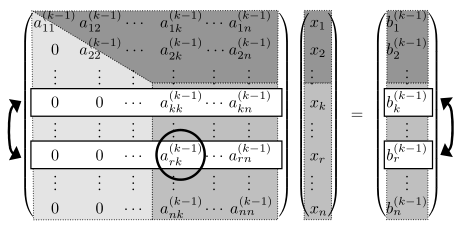 
$$\text{Zdroj: Čermák (2020).}$$


## Úplný výber hlavného prvku 

Tento prístup je opäť modifikáciou GEM, no môže pomôcť ešte výraznejšie zmenšiť absolútne hodnoty multiplikátorov. Docieli sa to tak, že v $k$-tom kroku eliminácie sa ako pivot vyberá prvok s najväčšou absolútnou hodnotou v doposiaľ neeliminovanej časti matice $\mathbf{A}^{(k-1)}$, t. j. v riadkoch $i\ge k$ a v stĺpcoch $j\ge k$. Nech teda $r$ je taký riadkový index a $s$ taký stĺpcový index, pre ktoré platí 

\begin{align*}\label{eq:FullPivot1} \tag{15}
\left|a_{rs}^{(k-1)}\right|=\underset{k\le i, j\le n}{\max}\left|a_{ij}^{(k-1)}\right|.
\end{align*} 

Následne sa vymení $k$-ta a $s$-ta rovnica a tiež sa vymení $k$-ta neznáma s $s$-tou neznámou - pozri nasledovný obrázok. 

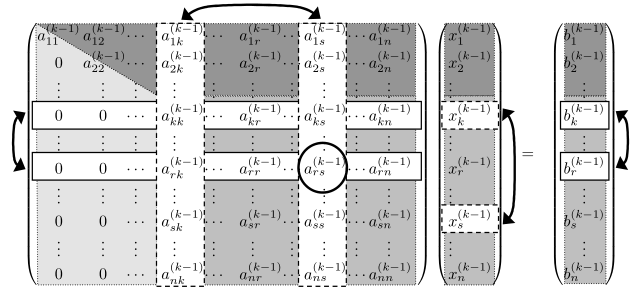 
$$\text{Zdroj: Čermák (2020).}$$ 

Zo sústavy rovníc $\mathbf{A}^{(k-1)}\mathbf{x}=\mathbf{b}^{(k-1)}$ tak vznikne sústava $\mathbf{A}^{(k)}\mathbf{x}=\mathbf{b}^{(k)}$, pričom $\mathbf{A}^{(k)}$ sa získa prehodením $k$-teho a $r$-teho riadka a prehodením $k$-teho a $s$-teho stĺpca matice $\mathbf{A}^{(k-1)}$. Podobne $\mathbf{b}^{(k)}$ vznikne prehodením $k$-teho a $r$-teho prvku vektora $\mathbf{b}^{(k-1)}$. Navyše $\mathbf{x}^{(k)}$ vznikne výmenou $k$-teho a $s$-teho prvku vektora $\mathbf{x}^{(k-1)}$, pričom $\mathbf{x}^{(0)}=\mathbf{x}$ je pôvodný vektor neznámych. Prehadzovanie neznámych sa eviduje vo vektore $\mathbf{p}=(p_1,p_2,\ldots,p_n)'$, kde na začiatku sa položí $p_i=i$ a pri každej výmene premenných (tzn. prehodenie stĺpcov matice sústavy) sa rovnako vymenia odpovedajúce prvky vektora $\mathbf{p}$. Po ukončení priameho chodu je $i$-ta zložka vektora $\mathbf{x}^{(n-1)}$ rovná $p_i$-tej zložke pôvodného vektora $\mathbf{x}^{(0)}$. Počas spätného chodu sa vypočíta $\mathbf{x}^{(n-1)}$ a pomocou vektora $\mathbf{p}$ sa určí riešenie $\mathbf{x}$. 

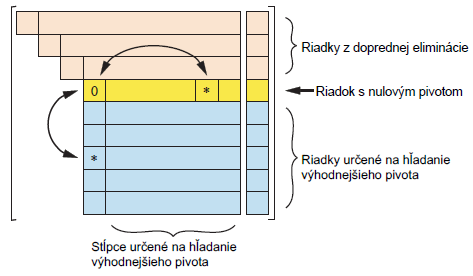 
$$\text{Zdroj: Kiseľák (2020).}$$

---

#### Poznámka 9 (Čiastočný vs úplný výber pivota)

Väčšinou sa používa iba čiastočný výber hlavného prvku. Teória i prax potvrdzujú, že aj čiastočný výber pivota stačí k tomu, aby zaokrúhľovacie chyby ostali dostatočne malé a neznehodnotili výsledné riešenie. Ďalším dôvodom uprednostnenia čiastočného výberu pivota je, že jeho realizácia vyžaduje výrazne menší počet operácií než úplný výber. 

--- 

## LU rozklad s čiastočným výberom hlavného prvku 

Ide o štandardnú rutinu implementovanú k každej knižnici (pre Python pozri Príklad 2) pre numerické riešenie úloh lineárnej algebry. Na vstupe je matica sústavy $\mathbf{A}$. Výstupné parametre sú tri: dolná trojuholníková matica $\mathbf{L}$ (s jednotkami na hlavnej diagonále), horná trojuholníková matica $\mathbf{U}$ a tzv. *permutačná matica* $\mathbf{P}$, pričom 

\begin{align*}\label{eq:LUPartialPivot1} \tag{16}
\mathbf{L}\mathbf{U}=\mathbf{P}\mathbf{A}.
\end{align*}  

Pritom **_permutačná matica_** je taká matica, ktorá vznikne z jednotkovej diagonálnej matice nejakým prehádzaním resp. permutáciou jej riadkov. Všimnime si na príklade, čo spôsobuje násobenie permutačnou maticou $\mathbf{P}$ 

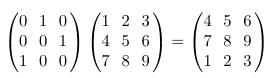 

kde $\mathbf{P}=\begin{pmatrix}0&1&0\\0&0&1\\1&0&0 \end{pmatrix}$. V podstate ide o výmenu (dvoch alebo viacerých) riadkov násobenej matice. To súvisí so zámenou riadkov napr. počas Gaussovej eliminácie ... Navyše $|\mathbf{P}|=\pm1$, keďže $\mathbf{P}$ vznikne z $\mathbf{I}$ prehodením riadkov. 

Teraz uvedieme popis algoritmu pre LU rozklad matice $\mathbf{A}$ s čiastočným výberom hlavných prvkov. 


---

<b> <ins> Algoritmus LUp </ins> </b> (s čiastočným výberom hlavného prvku)

**Krok 1** 

Vstup: $\mathbf{A}^{(0)}:=\mathbf{A}$; 

**Krok 2** 

Polož $\mathbf{P}^{(0)}:=\mathbf{I}$; 

**Krok 3** 

Postupne pre $k=1,2,\ldots,n-1$ opakuj: 

* Urč index $r$ riadka s pivotom podľa $(14)$; 

* Prehoď riadky $k$ a $r$ v matici $\mathbf{A}^{(k-1)}$ a polož $\mathbf{A}^{(k)}:=\mathbf{A}^{(k-1)}$; rovnako prehoď riadky $k$ a $r$ v matici $\mathbf{P}^{(k-1)}$ a polož $\mathbf{P}^{(k)}:=\mathbf{P}^{(k-1)}$; 

* Uprav maticu $\mathbf{A}^{(k)}$ elimináciou poddiagonálnych prvkov v $k$-tom stĺpci, t. j. postupne pre $i=k+1,k+2,\ldots,n$ počítaj 
<br/>
$$m_{ik}:=a_{ik}^{(k)}/a_{kk}^{(k)};$$ 
<br/>
$$a_{ij}^{(k)}:=a_{ij}^{(k)}-m_{ik}a_{kj}^{(k)} \text{ pre } j=k+1,k+2,\ldots,n;$$ 
<br/>
$$a_{ik}^{(k)}:=m_{ik};$$ 
<br/>
Do anulovaných pozícií $[i,k]$ matice $\mathbf{A}^{(k)}$ ukladaj multiplikátory $m_{ik}$;  

**Krok 4** 

* Dolnú trojuholníkovú maticu $\mathbf{L}$ zostroj tak, že na hlavnú diagonálu daj samé jednotky a poddiagonálne prvky prevezmi z výslednej matice $\mathbf{A}^{(n-1)}$; 

* Hornú trojuholníkovú maticu $\mathbf{U}$ vytvor z diagonálnych a naddiagonálnych prvkov výslednej matice $\mathbf{A}^{(n-1)}$;

* $\mathbf{P}:=\mathbf{P}^{(n-1)}$ 

**Krok 5** 

Výstup: $\mathbf{L}$, $\mathbf{P}$, $\mathbf{U}$.   

---

Po získaní matíc $\mathbf{L}$, $\mathbf{U}$, $\mathbf{P}$ je riešenie sústavy $\mathbf{A}\mathbf{x}=\mathbf{b}$ už jednoduché. Zrejme platí 

$$\mathbf{P}\mathbf{A}\mathbf{x}=\mathbf{P}\mathbf{b} \quad \Longrightarrow \quad \mathbf{L}\mathbf{U}\mathbf{x}=\mathbf{P}\mathbf{b}.$$ 

Preto sa najprv určí vektor $\mathbf{z}=\mathbf{P}\mathbf{b}$ - t. j. prvky vektora $\mathbf{b}$ pravých strán sa poprehadzujú pomocou permutačnej matice $\mathbf{P}$ rovnako, ako sa prehadzovali riadky matíc $\mathbf{A}^{(k-1)}$, $\mathbf{P}^{(k-1)}$ v algoritme LUp uvedenom vyššie. Ak označíme $\mathbf{U}\mathbf{x}=\mathbf{y}$, vidíme, že $\mathbf{y}$ je riešenie sústavy $\mathbf{L}\mathbf{y}=\mathbf{z}$. Vyriešením tejto sústavy dostaneme $\mathbf{y}$. Ostáva ešte vyriešiť sústavu $\mathbf{U}\mathbf{x}=\mathbf{y}$ a tým pádom sa nájde požadované riešenie $\mathbf{x}$. Ak to zhrnieme, tak počítame postupne $\mathbf{z}$, $\mathbf{y}$, $\mathbf{x}$ zo sústav rovníc 

\begin{align*}\label{eq:LUPartialPivot2} \tag{17}
\mathbf{z}=\mathbf{P}\mathbf{b}, \quad \mathbf{L}\mathbf{y}=\mathbf{z}, \quad \mathbf{U}\mathbf{x}=\mathbf{y}. 
\end{align*} 


---

#### Poznámka 10 

* Uchovávanie histórie prehadzovaných riadkov v matici $\mathbf{P}$ je zrejme plytvanie miestom v pamäti počítača. Totiž, z celkového počtu $n^2$ prvkov matice $\mathbf{P}$ je iba $n$ prvkov nenulových. Preto **miesto matice $\mathbf{P}$ stačí pracovať len s** **_vektorom riadkových permutácií $\mathbf{p}$_**. 


* Na začiatku položíme $\mathbf{p}^{(0)}=(1,2,\ldots,n)'$ a v zbytku algoritmu potom prehadzujeme prvky vektora $\mathbf{p}^{(k-1)}$. Matica $P$ bola potrebná len pre zostavenie vektora $\mathbf{z}$. To ale dokážeme aj pomocou vektora $\mathbf{p}$: do $i$-tej zložky vektora $\mathbf{z}$ sa vloží $p_i$-tá zložka vektora $\mathbf{b}$, postupne pre $i=1,2,\ldots,n$. 

--- 

--- 

#### <font color=blue> Príklad 6 </font>  

Urobíme LU rozklad matice 

$$\mathbf{A}=\begin{pmatrix}
-0.4&-0.95&-0.4&-7.34\\
0.5&-0.3&2.15&-2.45\\
-2&4&1&-3\\
-1&5.5&2.5&3.5
\end{pmatrix}.$$ 

V prvom stĺpci nájdeme pivota číslo $-2$ v treťom riadku. Preto sa prehodí prvý a tretí riadok. Následne sa eliminujú poddiagonálne prvky v prvom stĺpci a na ich miesta sa zapíšu použité multiplikátory. Prehodenie riadkov sa poznačí v permutačnom vektore. Takto dostaneme 

$$\mathbf{A}^{(1)}=\begin{pmatrix}
-2&4&1&-3\\
-0.25&0.7&2.4&-3.2\\
0.2&-1.75&-0.6&-6.74\\
0.5&3.5&2&5
\end{pmatrix}, \quad \mathbf{p}^{(1)}=\begin{pmatrix}
3\\
2\\
1\\
4
\end{pmatrix}.$$ 

Prvý riadok sa už meniť nebude. V druhom kroku nájdeme pivota v druhom stĺpci. Je to číslo $3.5$ vo štvrtom riadku. Preto vymeníme druhý a štvrtý riadok v matici $\mathbf{A}^{(1)}$ aj vo vektore $\mathbf{p}^{(1)}$. Následne sa eliminujú prvky na pozíciach $[3,2]$ a $[4,2]$. Na ich miesta sa zapíšu použité multiplikátory. Výsledkom je 

$$\mathbf{A}^{(2)}=\begin{pmatrix}
-2&4&1&-3\\
0.5&3.5&2&5\\
0.2&-0.5&0.4&-4.24\\
-0.25&0.2&2&-4.2
\end{pmatrix}, \quad \mathbf{p}^{(2)}=\begin{pmatrix}
3\\
4\\
1\\
2
\end{pmatrix}.$$  

Prvé dva riadky ostanú už bez zmeny. Ďalej sa nájde pivot v treťom stĺpci - je to číslo $2$ vo štvrtom riadku. Preto sa vymení tretí a štvrtý riadok v matici $\mathbf{A}^{(2)}$ a tiež vo vektore $\mathbf{p}^{(2)}$. Potom sa eliminuje prvok na pozícii $[4,3]$ a na jeho miesto sa vloží použitý multiplikátor. Takto vznikne 

$$\mathbf{A}^{(3)}=\begin{pmatrix}
-2&4&1&-3\\
0.5&3.5&2&5\\
-0.25&0.2&2&-4.2\\
0.2&-0.5&0.2&-3.4 
\end{pmatrix}, \quad \mathbf{p}^{(3)}=\begin{pmatrix}
3\\
4\\
2\\
1
\end{pmatrix}.$$ 

Dostali sme teda 

$$\mathbf{L}=\begin{pmatrix}
1&0&0&0\\
0.5&1&0&0\\
-0.25&0.2&1&0\\
0.2&-0.5&0.2&1 
\end{pmatrix} \quad \mathbf{U}=\begin{pmatrix}
-2&4&1&-3\\
0&3.5&2&5\\
0&0&2&-4.2\\
0&0&0&-3.4 
\end{pmatrix}.$$

Permutačný vektor $\mathbf{p}=\mathbf{p}^{(3)}$. Pokiaľ by sme chceli vytvoriť permutačnú maticu $\mathbf{P}$, stačí vziať jednotkovú diagonálnu maticu $\mathbf{I}$ a preusporiadať jej riadky tak, že pôvodne $p_i$-tý riadok sa stane riadkom $i$-tým. Po realizácii dostaneme 

$$\mathbf{p}=\begin{pmatrix}
3\\
4\\
2\\
1
\end{pmatrix} \quad \text{a} \quad \mathbf{I}=\begin{pmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&1&0\\ 
0&0&0&1
\end{pmatrix} \quad \Longrightarrow \quad \mathbf{P}=\begin{pmatrix}
0&0&1&0\\
0&0&0&1\\
0&1&0&0\\
1&0&0&0
\end{pmatrix}.$$

Ľahko sa overí, že $\mathbf{L}\mathbf{U}=\mathbf{P}\mathbf{A}$. 

Ukážeme si ešte riešenie SLR pre zvolenú pravú stranu. Vezmime napr. 

$$\mathbf{b}=\begin{pmatrix}
-13.14\\
2.15\\
9\\
27.5
\end{pmatrix}, \quad \text{potom} \quad \mathbf{z}=\begin{pmatrix}
9\\
27.5\\
2.15\\
-13.14
\end{pmatrix}.$$ 

Ďalej riešením sústav $\mathbf{L}\mathbf{y}=\mathbf{z}$ a potom $\mathbf{U}\mathbf{x}=\mathbf{y}$ dostaneme 

$$\mathbf{y}=\begin{pmatrix}
9\\
23\\
-0.2\\
-3.4
\end{pmatrix}, \quad \mathbf{x}=\begin{pmatrix}
3\\
4\\
2\\
1
\end{pmatrix}.$$

In [40]:
# NumPy

A = np.array([[-0.4, -0.95, -0.4, -7.34],
              [0.5, -0.3, 2.15, -2.45],
              [-2, 4, 1, -3],
              [-1, 5.5, 2.5, 3.5]])
print('A = ')
print(A)
print('')
print('b =')
b = np.array([-13.14, 2.15, 9, 27.5])
print(b) 
print('') 

# LU rozklad s ciastocnym vyberom prvku - SciPy
print('LU rozklad s ciastocnym vyberom prvku:')
print('')
P, L, U = lu(A, permute_l=False) 
P = P.T # transpozicia, lebo funkcia lu() vracia transponovanu maticu P 
print('P = ')
print(P) 
print('')
print('L = ')
print(L) 
print('')
print('U = ') 
print(U)
print('')
# kontrola 1 
print('kontrola 1:') 
print('') 
print('LU = ')
print(L @  U)  
print('') 
print('PA = ')
print(P @ A) 
print('') 
# kontrola 2 (matica P ma ako inverznu maticu svoju transpoziciu)
print('kontrola 2:') 
print('') 
print('A = ')
print(A) 
print('') 
print('PLU = ')
print(P.T @ L @ U) 
print('')
print('riesenie sustavy Ly=z')
print('')
z = P @ b
print('z = ') 
print(z)
print('')
y = sci.linalg.solve(L,z)
print('y = ')
print(y) 
print('')
print('riesenie sustavy Ux=y')
print('') 
x = sci.linalg.solve(U,y)
print('x = ')
print(x) 

A = 
[[-0.4  -0.95 -0.4  -7.34]
 [ 0.5  -0.3   2.15 -2.45]
 [-2.    4.    1.   -3.  ]
 [-1.    5.5   2.5   3.5 ]]

b =
[-13.14   2.15   9.    27.5 ]

LU rozklad s ciastocnym vyberom prvku:

P = 
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

L = 
[[ 1.    0.    0.    0.  ]
 [ 0.5   1.    0.    0.  ]
 [-0.25  0.2   1.    0.  ]
 [ 0.2  -0.5   0.2   1.  ]]

U = 
[[-2.   4.   1.  -3. ]
 [ 0.   3.5  2.   5. ]
 [ 0.   0.   2.  -4.2]
 [ 0.   0.   0.  -3.4]]

kontrola 1:

LU = 
[[-2.    4.    1.   -3.  ]
 [-1.    5.5   2.5   3.5 ]
 [ 0.5  -0.3   2.15 -2.45]
 [-0.4  -0.95 -0.4  -7.34]]

PA = 
[[-2.    4.    1.   -3.  ]
 [-1.    5.5   2.5   3.5 ]
 [ 0.5  -0.3   2.15 -2.45]
 [-0.4  -0.95 -0.4  -7.34]]

kontrola 2:

A = 
[[-0.4  -0.95 -0.4  -7.34]
 [ 0.5  -0.3   2.15 -2.45]
 [-2.    4.    1.   -3.  ]
 [-1.    5.5   2.5   3.5 ]]

PLU = 
[[-0.4  -0.95 -0.4  -7.34]
 [ 0.5  -0.3   2.15 -2.45]
 [-2.    4.    1.   -3.  ]
 [-1.    5.5   2.5   3.5 ]]

riesenie sustavy Ly=z

z = 
[  9.    27

In [3]:
# SymPy 
from sympy import init_printing
init_printing() 

x1, x2, x3, x4 = x = sym.symbols('x1:5') 
print(x)
# definuje sa rozsirena matica sustavy (A,b) tzn. matica A a k nej "prilepeny" sprava stlpcovy vektor pravych stran b 
A = sym.Matrix(( (-0.4, -0.95, -0.4, -7.34, -13.14), (0.5, -0.3, 2.15, -2.45, 2.15), (-2, 4, 1, -3, 9), (-1, 5.5, 2.5, 3.5, 27.5) )) 
print(A)
# riesenie SLR pomocou LU rozkladu 
res = sym.solve_linear_system_LU(A, x) 
print(res)

(x1, x2, x3, x4)
Matrix([[-0.400000000000000, -0.950000000000000, -0.400000000000000, -7.34000000000000, -13.1400000000000], [0.500000000000000, -0.300000000000000, 2.15000000000000, -2.45000000000000, 2.15000000000000], [-2, 4, 1, -3, 9], [-1, 5.50000000000000, 2.50000000000000, 3.50000000000000, 27.5000000000000]])
{x1: 3.00000000000000, x2: 4.00000000000000, x3: 2.00000000000000, x4: 1.00000000000000}


--- 

## Výpočet determinantu 

Z lineárnej algebry je známe, že determinant $\det(\mathbf{A})$ resp. $|\mathbf{A}|$ matice $\mathbf{A}$: 

a) sa nemení, keď k riadku matice $\mathbf{A}$ pripočítame násobok iného riadka matice $\mathbf{A}$; 

b) zmení znamienko, keď prehodíme dva jeho (rôzne) riadky alebo stĺpce. 

Ak teda realizujeme GEM podľa algoritmu GEMz, t. j. bez výberu hlavných prvkov, potom $\det(\mathbf{A})=\det(\mathbf{U})=u_{11}u_{22}\ldots u_{nn}$ dostaneme ako súčin diagonálnych prvkov matice $\mathbf{U}$ (využije sa známy fakt $\det(\mathbf{L}\mathbf{U})=\det(\mathbf{L})\det({\mathbf{U}})$). Pokiaľ realizujeme čiastočný alebo úplný výber hlavných prvkov, tak stačí, keď si uložíme do nejakej premennej mapr. $q$, celkový počet výmen riadkov (pri čiastočnom výbere) alebo celkový počet výmen riadkov i stĺpcov (pri úplnom výbere). Ak je $q$ párne, potom $\det(\mathbf{A})=\det(\mathbf{U})$. Pre nepárne $q$ máme $\det(\mathbf{A})=-\det(\mathbf{U})$. Platí teda 

\begin{align*}\label{eq:LUPivotDet} \tag{18}
\det(\mathbf{A})=(-1)^qu_{11}u_{22}\ldots u_{nn}. 
\end{align*} 


## Riešenie SLR s viacerými pravými stranami 

V princípe ide o to, že miesto jedného vektora pravých strán sa pracuje s viacerými vektorymi pravých strán. Vzorce $(9)$, $(17)$ ostávajú v platnosti a jediný rozdiel je v tom, že teraz $\mathbf{b}\equiv\mathbf{B}=(\mathbf{b}_1,\mathbf{b}_2,\ldots,\mathbf{b}_m)$ je matica, ktorej stĺpce sú vektory pravých strán a tým pádom tiež $\mathbf{x}\equiv\mathbf{X}$, $\mathbf{y}\equiv\mathbf{Y}$ prípadne $\mathbf{z}\equiv\mathbf{Z}$ sú matice rovnakých rozmerov ako matica $\mathbf{B}$. V takom prípade je $i$-tý stĺpec matice $\mathbf{X}=(\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_m)$ riešením SLR s $i$-tou pravou stranou $\mathbf{b}_i$. Prípadu, ktorý zahŕňa úplný výber pivota, sa tu detailnejšie venovať nebudeme. 

Pokiaľ ide o počet operácií, tak pre každú pravú stranu je potrebné započítať približne $n^2$ násobiacich operácií a rovnaký počet sčítacích operácií, takže celkovo je to $mn^2+O(n)$ operácií. Ak je počet $m$ pravých strán malý (resp. rádovo menší) v porovnaní s počtom $n$ rovníc, tak náklady na realizáciu LU rozkladu výrazne prevažujú. 

## Výpočet inverznej matice 

Výpočet inverznej matice $\mathbf{A}^{-1}$ k matici $\mathbf{A}$ je možné urobiť tak, že sa rieši SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$ s $n$ pravými stranami, t. j. vlastne sústava $\mathbf{A}\mathbf{X}=\mathbf{B}$ kde $\mathbf{B}=\mathbf{I}$, pričom $\mathbf{I}$ je jednotková diagonálna matica. Ak túto úlohu riešime buď bez výberu pivota alebo s čiastočným výberom pivota, tak dostaneme $\mathbf{X}=\mathbf{A}^{-1}$. Vzhľadom k špecifickej pravej strane $\mathbf{B}=\mathbf{I}$ je možné priamy i spätných chod GEM realizovať pomocou $\dfrac{1}{2}n^3+O\left(n^2\right)$ operácií, takže celkovo je potrebných $n^3+O\left(n^2\right)$ operácií. 

## Riedka matica sústavy 

Hovoríme, že **_matica_** je **_riedka_**, keď počet jej nenulových prvkov je výrazne menší ako počet všetkých jej prvkov. Tieto matice často vznikajú v rôznych aplikáciách. Bežný je prípad, keď počet nenulových koeficientov v rovnici neprevýši malé číslo $m$, ktoré vôbec nezávisí na počte $n$ rovníc, takže s rastúcim $n$ vzniká stále redšia a redšia matica sústavy. Riedke matice sú v pamäti počítača  účelovo reprezentované iba pomocou svojich nenulových koeficientov. Na riešenie sústav s riedkými maticami existujú veľmi efektívne algoritmy. Jedným z hlavných cieľov, ktoré tieto algoritmy sledujú, je realizácia eliminačných krokov v takom poradí, aby vznikalo čo najmenej nových nenulových koeficientov. 

## Pásová matica sústavy

Špeciálnym prípadom riedkej matice je tzv. *pásová matica*, ktorá má nenulové koeficienty len v páse okolo hlavnej diagonály. Presnejšie tento pojem zavádza Definícia 3. 

---

### <font color=red> Definícia 3 </font> 

Matica $\mathbf{A}=\left\{a_{ij}\right\}_{i,j=1}^{n}$, pre ktorú existujú celé nezáporné čísla $p,q$ také, že platí $a_{ij}=0$, ak $i>j+p$ alebo $j>i+q$, sa nazýva **_pásová matica_** s pásom o šírke $w=p+q+1$ (matica má $p$ poddiagonál a $q$ naddiagonál).

Číslo $s=\max\{p,q\}$ sa nazýva **_polovičná šírka pásu_**. 

--- 

---

#### Poznámka 11 

Pre maticu s polovičnou šírkou pásu $s$ zrejme platí $a_{ij}=0$, ak $|i-j|>s$. 

--- 

Pri eliminácii pásových matíc môžu nenulové koeficienty vznikať len vo vnútri pásu. To sa dá využiť a docieliť tak značnú úsporu jednak v reprezentácii pásovej matice sústavy v pamäti počítača ale tiež v počte potrebných operácií. Pre maticu s polovičnou šírkou pásu $s=p=q=O(1)$ potrebuje LU rozklad bez výberu pivota $ns^2+O(1)$ operácií a spätný chod vyžaduje $ns+O(1)$ operácií. Symbol $O(1)$ pri tom reprezentuje číslo nezávislé od $n$. 

## SLR s tridiagonálnou maticou 

Pásová matica s polovičnou šírkou pásu $s=1$ sa nazýva **_tridiagonálna matica_**. SLR s tridiagonálnou maticou sústavy vyzerá takto: 

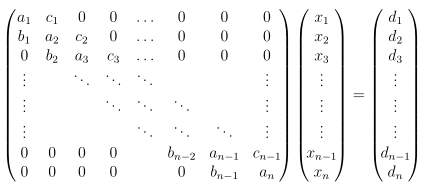 

**Algoritmus GEM na riešenie SLR s tridiagonálnou maticou sústavy** je veľmi jednoduchý. Bez výberu hlavných prvkov vyzerá priamy chod nasledovne: 

$$b_i:=b_i/a_i, \quad a_{i+1}:=a_{i+1}-b_ic_i, \quad d_{i+1}:=d_{i+1}-b_id_i, \quad i=,2,\ldots,n-1$$

a spätný chod prebieha podľa týchto krokov: 

$$x_n:=d_n/a_n, \quad \text{ a ďalej } \quad x_i:=(d_i-c_ix_{i+1})/a_i, \quad i=n-1,n-2,\ldots,1.$$

Transformovaná matica sústavy obsahuje koeficienty LU rozkladu pôvodnej matice sústavy. 


***
<a id=zaokruhlovacie_chyby></a>
 # <font color=brown> Vplyv zaokrúhľovacích chýb </font> 

Pri riešení SLR sú takmer vždy prítomné zaokrúhľovacie chyby. Ich vplyv preskúmame v nasledujúcom príklade. 

--- 

#### <font color=blue> Príklad 7 </font>  

Predpokladajme, že na hypotetickom počítači s trojmiestnou mantisou máme vyriešiť sústavu 

$$\begin{pmatrix}3.96&1.01\\1&0.25\end{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix}=\begin{pmatrix}5.03\\1.25\end{pmatrix}.$$

Približné riešenie označíme $\tilde{\mathbf{x}}=(\tilde{x}_1,\tilde{x}_2)'$. Keďže $3.96>1$, nie je potrebné vymieňať rovnice a multiplikátor je $m_{21}=1/3.96\doteq0.253$. Od druhej rovnice odčítame $m_{21}$-násobok prvej rovnice, t.j. 

$$(0.25-0.253\times1.01)\times x_2=1.25-0.253\times 5.03.$$

Pri zaokrúhľovaní na tri platné cifry dostaneme $1.01\times0.253\doteq0.256$ a $5.03\times0.253\doteq1.27$, takže 

$\tilde{x}_2=\dfrac{-0.02}{-0.006}\doteq3.33$. 

Následne z prvej rovnice vypočítame $\tilde{x}_1=(5.03-1.01\times3.33)/3.96\doteq0.422$. Dostali sme teda približné riešenie 

$$\tilde{\mathbf{x}}=(0.422,3.33)'.$$

Ak určíme (presne) **_reziduum_** $\mathbf{r}=\mathbf{b}-\mathbf{A}\tilde{\mathbf{x}}$, tak dostaneme 

$$\mathbf{r}=\begin{pmatrix}5.03 - 3.96 \times 0.422 - 1.01 \times 3.33\\ 1.25 - 1 \times 0.422 - 0.25 \times 3.33 \end{pmatrix}=\begin{pmatrix}-0.00442\\-0.00450\end{pmatrix}.$$

To by nás mohlo navádzať k myšlienke, že získané riešenie $\tilde{\mathbf{x}}$ je prakticky presné. Nie je to tak, lebo presné riešenie je 

$$\mathbf{x}=\begin{pmatrix}0.25\\ 4\end{pmatrix},$$ 

takže $\tilde{x}_1$, $\tilde{x}_2$ nemajú platnú ani jednu cifru! Pre zaujímavosť uvádzame, že pre $p=4,6,\ldots$ cifier mantisy dostaneme presné riešenie a pre $p=5,7,\ldots$ dostaneme riešenie, ktorého zložky majú $p-3$ platných cifier. 

---

---

#### Poznámka 12 

* Napariek tomu, že Príklad 7 je značne umelý, je jednoduchou a užitočnou ilustráciou všeobecne platného tvrdenia: _Gaussova eliminácia s čiastočným výberom hlavných prvkov zaručuje vznik malých reziduí_.


* Slovom "zaručuje" sa myslí to, že je možné dokázať matematickú vetu, ktorá (pri splnení určitých technických predpokladov súvisiacich s výpočtami s pohyblivou rádovou čiarkou) predstavuje nerovnosť obmedzujúcu veľkosť jednotlivých zložiek rezidua. 


* Ďalej výrazom "malých" sa rozumie "rádovo veľkosť zaokrúhľovacích chýb relatívne vzhladom k trom veličinám:" k veľkosti prvkov pôvodnej matice koeficientov $\mathbf{A}$; k veľkosti prvkov matíc $\mathbf{A}^{(k)}$ vznikajúcich v priebehu eliminácie; k veľkosti prvkov (približného) riešenia $\tilde{\mathbf{x}}$. 


* I keď je reziduum malé, vyššie spomínané tvrdenie nehovorí nič o veľkosti chyby $\tilde{\mathbf{x}}-\mathbf{x}$. K posúdeniu vzťahu medzi veľkosťou rezidua a veľkosťou chyby sa používa veličina známa ako _číslo podmienenosti matice_. 

--- 

***
<a id=podmienenost></a>
 # <font color=brown> Podmienenosť </font> 

K tomu, aby sme mohli určiť podmienenosť úlohy "nájsť riešenie $\mathbf{x}$ SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$", potrebujeme posúdiť, ako veľmi sa zmení riešenie $\mathbf{x}$, keď sa "trochu" zmenia (vstupné) dáta - t.j. matica sústavy $\mathbf{A}$ a vektor pravých strán $\mathbf{b}$. K "meraniu veľkosti" čísel slúži absolútna hodnota čísla a podobný (všeobecnejší) nástroj na "meranie veľkosti" vektorov i matíc, ktorého absolútna hodnota je špeciálny prípad, zavedieme teraz.  

## Maticové a vektorové normy, číslo podmienenosti matice 

---

### <font color=red> Definícia 4 </font> 

***Norma vektora*** je funkcia $\lVert\cdot\rVert:\,\,\mathbb{R}^n\to\mathbb{R}_0^+$, $n\in\mathbb{N}$ taká, ktorá spĺňa nasledujúce podmienky: 

1. $\lVert\mathbf{x}\rVert=0$ práve vtedy, keď $\mathbf{x}=\mathbf{0}$, pričom $\mathbf{x},\mathbf{0}\in\mathbb{R}^n$ a $\mathbf{0}=(0,0,\ldots,0)'$; 


2. $\lVert c\mathbf{x} \rVert=|c|\cdot\lVert\mathbf{x}\rVert$ pre každé $\mathbf{x}\in\mathbb{R}^n$, $c\in\mathbb{R}$ (homogenita); 


3. $\lVert \mathbf{x}+\mathbf{y} \rVert \le \lVert\mathbf{x}\rVert + \lVert\mathbf{y}\rVert$ pre každé $\mathbf{x},\mathbf{y}\in\mathbb{R}^n$ (trojuholníková nerovnosť). 

--- 

* Známa a používaná trieda vektorových noriem sa označuje $\ell_p$, závisí na parametri $p$, pričom $1\le p \le \infty$ a pre vektor $\mathbf{x}=(x_1,x_2,\ldots,x_n)'\in\mathbb{R}^n$ je definovaná predpisom: 

$$\lVert \mathbf{x} \rVert_p=\left(\displaystyle\sum\limits_{i=1}^{n}|x_i|^p\right)^{1/p}.$$


* Najčastejšie sa pracuje s $\ell_p$ normami pre $p=1$, $p=2$ alebo limitný prípad $p\to\infty$ : 

$$\lVert\mathbf{x}\rVert_{1}=\displaystyle\sum\limits_{i=1}^{n}|x_i|, \quad \lVert\mathbf{x}\rVert_2=\left(\displaystyle\sum\limits_{i=1}^{n}x_i^2\right)^{1/2}, \quad \lVert\mathbf{x}\rVert_{\infty}=\underset{i}{\max}|x_i|.$$

Nasledujúci obrázok ilustruje situáciu, keď je $\lVert\mathbf{x}\rVert_2\le1$ v 2D aj v 3D a potom tiež situáciu, keď je $\lVert\mathbf{x}\rVert_\infty\le1$ v 2D aj v 3D. 

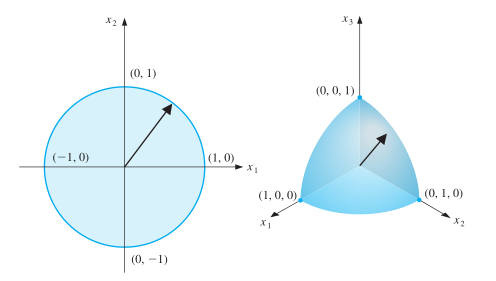
$$\text{Zdroj: Burden et al. (2005).}$$

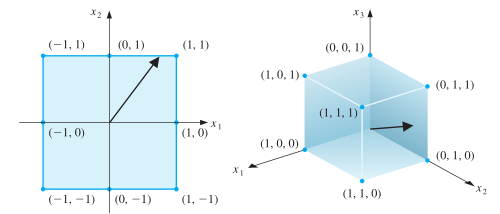 
$$\text{Zdroj: Burden et al. (2005).}$$

* $\ell_1$-norma je tiež známa ako _Manhattan_ resp. **_Manhattanská norma_**, lebo zodpovedá vzdialenosti medzi dvoma miestami v pravouhlej mriežke mestkých ulíc. Ďalej $\ell_2$-norma je bežná **_Euclidova_** vzdialenosť resp. dĺžka vektora. Napokon $\ell_{\infty}$-norma sa niekedy nazýva aj **_Chebysevova norma_**. 


* Keď špecifikácia normy $p$ nie je podstatná, tak sa zvykne vynechávať zo zápisu a značenie sa zjednodušuje na tvar $\lVert\mathbf{x}\rVert$.  


<font color=orange> Zdôvodnite/overte, že vektorové normy $\lVert\mathbf{x}\rVert_{1}$, $\lVert\mathbf{x}\rVert_{2}$, $\lVert\mathbf{x}\rVert_{\infty}$ spĺňajú Definíciu 4. </font> 

**_Ekvivalenciu vektorových noriem_** ([odkaz1](https://people.math.wisc.edu/~seeger/522/equiv-norms.pdf), [odkaz2](https://kconrad.math.uconn.edu/blurbs/gradnumthy/equivnorms.pdf)) ilustruje nasledujúci obrázok: 

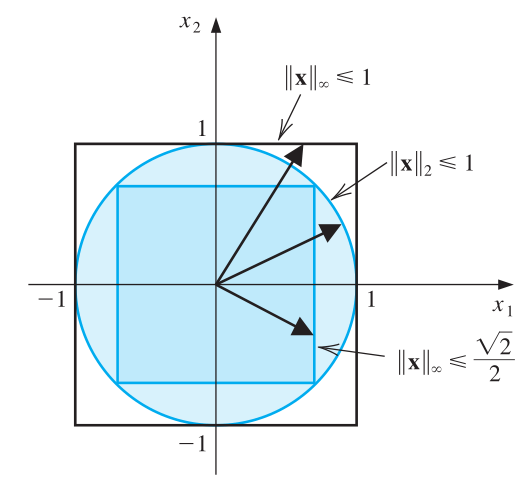
$$\text{Zdroj: Burden et al. (2005).}$$


---

### <font color=red> Definícia 5 </font> 

**_Norma matice_** je funkcia $\lVert\cdot\rVert:\,\,\mathbb{R}^{m\times n}\to\mathbb{R}_0^+$, $n\in\mathbb{N}$ taká, ktorá spĺňa nasledujúce podmienky: 

1. $\lVert\mathbf{A}\rVert=0$ práve vtedy, keď $\mathbf{A}=\mathbf{O}$, pričom $\mathbf{A},\mathbf{O}\in\mathbb{R}^{m\times n}$ a $\mathbf{O}$ je nulová matica; 


2. $\lVert c\mathbf{A} \rVert=|c|\cdot\lVert\mathbf{A}\rVert$ pre každé $\mathbf{A}\in\mathbb{R}^{m\times n}$, $c\in\mathbb{R}$ (homogenita); 


3. $\lVert \mathbf{A}+\mathbf{B} \rVert \le \lVert\mathbf{A}\rVert + \lVert\mathbf{B}\rVert$ pre každé $\mathbf{A},\mathbf{B}\in\mathbb{R}^{m\times n}$ (trojuholníková nerovnosť). 

--- 

* **_Prirodzená_** alebo tiež **_indukovaná_** maticová norma **_pridružená_** k vektorovej norme je definovaná predpisom 

\begin{align*}\label{eq:NaturalAsocVectorNorm} \tag{19}
\lVert\mathbf{A}\rVert=\underset{\mathbf{x}\neq\mathbf{0}}{\max}\dfrac{\lVert\mathbf{A}\mathbf{x}\rVert}{\lVert\mathbf{x}\rVert}= \underset{\lVert\mathbf{x}\rVert=1}{\max}\lVert\mathbf{A}\mathbf{x}\rVert. 
\end{align*} 


* Vo vzťahu \eqref{eq:NaturalAsocVectorNorm} sa niekedy (všeobecnejšie) uvádza supremum miesto maxima, avšak na kompaktnej množine sa supremum nadobúda a je rovné maximu. 


* Prirodzená maticová norma pridružená k vektorovej $\ell_p$-norme je daná vzťahom 

$$\lVert\mathbf{A}\rVert_p=\underset{\mathbf{x}\neq\mathbf{0}}{\max}\dfrac{\lVert\mathbf{A}\mathbf{x}\rVert_p}{\lVert\mathbf{x}\rVert_p}= \underset{\lVert\mathbf{x}\rVert_p=1}{\max}\lVert\mathbf{A}\mathbf{x}\rVert_p.$$


* Nie je ťažké overiť, že 

$$\lVert\mathbf{A}\rVert_1=\underset{1\le j\le n}{\max}\displaystyle\sum\limits_{i=1}^{n}|a_{ij}| \quad \text{(maximum stĺpcových súčtov)},$$ 

$$\lVert\mathbf{A}\rVert_{\infty}=\underset{1\le i\le n}{\max}\displaystyle\sum\limits_{j=1}^{n}|a_{ij}| \quad \text{(maximum riadkových súčtov)}.$$ 


* Miera daná matici podľa prirodzenej normy opisuje, ako matica naťahuje jednotkové vektory vzhľadom na túto normu. Maximálne natiahnutie je normou matice.

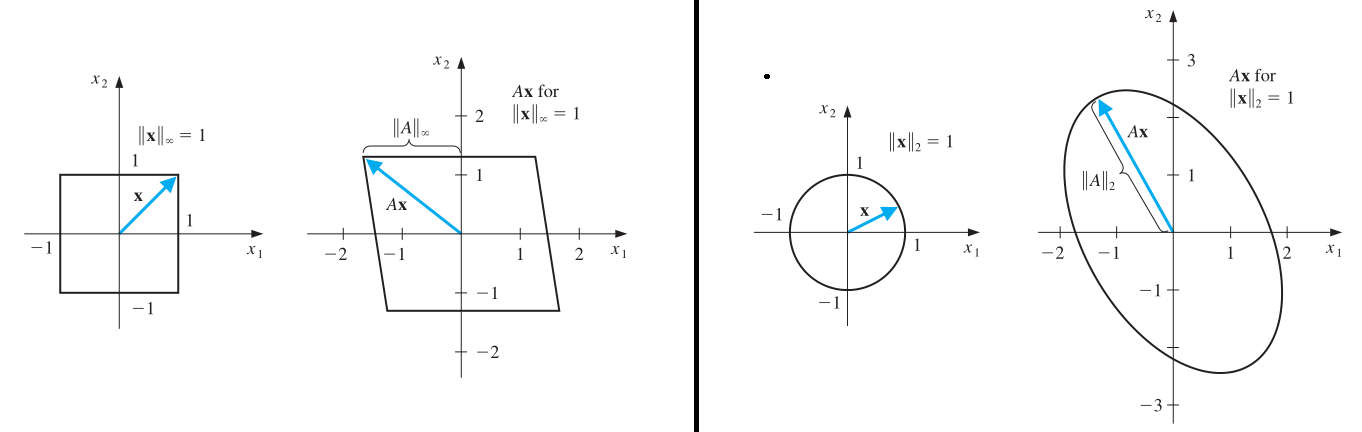 
$$\text{Zdroj: Burden et al. (2005).}$$

* Prirodzená maticová norma pridružená k vektorovej $\ell_2$-norme je známa ako **_spektrálna norma_**. Pritom platí  

$$\lVert\mathbf{A}\rVert_{2}=\sigma_{max}(\mathbf{A})=\sqrt{\lambda_{max}(\mathbf{A}'\mathbf{A})},$$ 

kde $\sigma_{max}(\mathbf{A})$ je najväčšie [singulárne číslo matice](https://mathworld.wolfram.com/SingularValue.html) $\mathbf{A}$ a $\lambda_{max}(\mathbf{A}'\mathbf{A})$ je najväčšie [vlastné číslo matice](https://mathworld.wolfram.com/Eigenvalue.html) $\mathbf{A}'\mathbf{A}$. Pre symetrickú maticu $\mathbf{A}$ platí 

$$\lVert\mathbf{A}\rVert_{2}=\varrho(\mathbf{A})=\underset{1\le i \le n}{\max}|\lambda_i(\mathbf{A})|,$$ 

kde $\lambda_i(\mathbf{A})$, $i=1,2,\ldots,n$ sú vlastné čísla matice $\mathbf{A}$ a číslo $\varrho(\mathbf{A})=|\lambda_{max}(\mathbf{A})|$ sa nazýva **_[spektrálny polomer](https://mathworld.wolfram.com/SpectralRadius.html)_** matice $\mathbf{A}$. Pre p. d. maticu máme vzťah 
 
$$\lVert\mathbf{A}\rVert_{2}=\lambda_{max}(\mathbf{A}).$$ 


* Ak vektorová norma $\lVert\cdot\rVert_V$ a maticová norma $\lVert\cdot\rVert_M$ spĺňajú vzťah 

\begin{align*}\label{eq:VectorMatrixNormCongruent} \tag{20}
\lVert\mathbf{A}\mathbf{x}\rVert_V\le\lVert\mathbf{A}\rVert_M\cdot\lVert\mathbf{x}\rVert_V, 
\end{align*} 

hovoríme, že maticová norma $\lVert\cdot\rVert_M$ je ***súhlasná*** (kompatibilná) s vektorovou normou $\lVert\cdot\rVert_V$. Ľahko je možné overiť, že prirodzená maticová norma je s pridruženou vektorovou normou súhlasná. 


* Existujú aj iné prirodzené maticové normy. Jednou z nich je **_Frobeniova norma_** daná vzťahom 

\begin{align*}\label{eq:FrobeniusNorm} \tag{21}
\lVert\mathbf{A}\rVert_F=\left(\displaystyle\sum\limits_{i,j=1}^{n}a_{ij}^2\right)^{1/2}, 
\end{align*} 

o ktorej sa dá dokázať, že je to norma súhlasná s $\ell_2$ normou, tzn. platí 

$$\lVert\mathbf{A}\mathbf{x}\rVert_2\le\lVert\mathbf{A}\rVert_F\cdot\lVert\mathbf{x}\rVert_2.$$


<font color=orange> Uvažujte maticu $\mathbf{A}=\begin{pmatrix}2&2&6\\1&3&9\\6&1&0\end{pmatrix}$. Riadne vypočítajte (môžete využiť Python) a následne overte pomocou funckie `norm()` z balíka _NumPy_ (modul _linalg_): $\lVert\mathbf{A}\rVert_{1}$, $\lVert\mathbf{A}\rVert_{2}$, $\lVert\mathbf{A}\rVert_{\infty}$, $\lVert\mathbf{A}\rVert_{F}$. </font> 

---

#### Poznámka 13 

Všetky maticové normy zavedené vyššie zdieľajú jednu spoločnú užitočnú vlastnosť - tzv. **_submultiplikatívnosť_** 

$$\lVert\mathbf{A}\mathbf{B}\rVert\le\lVert\mathbf{A}\rVert\cdot\lVert\mathbf{B}\rVert, \quad \mathbf{A},\mathbf{B}\in\mathbb{R}^{n\times n}.$$

Vo všeobecnosti túto vlastnosť maticová norma mať nemusí. Navyše môže byť maticová norma definovaná aj pre obdĺžnikovú (nie nutne štvorcovú) maticu. 

--- 

Kľúčovú úlohu pri posúdení podmienenosti úlohy "nájsť riešenie $\mathbf{x}$ SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$" hrá tzv. *číslo podmienenosti matice* $\mathbf{A}$. 

---

### <font color=red> Definícia 6 </font> 

Pre reálnu (komplexnú) maticu $\mathbf{A}$ je **_číslo podmienenosti_** $\kappa(\mathbf{A})$ definované vzťahom 

\begin{align*}\label{eq:MatrixCondNum} \tag{22}
\kappa(\mathbf{A})=\lVert\mathbf{A}\rVert\cdot\lVert\mathbf{A}^{-1}\rVert. 
\end{align*} 

--- 

---

#### Poznámka 14 

* Konkrétna hodnota čísla podmienenosti závisí na použitej maticovej norme. Pre maticovú $p$-normu budeme značiť $\kappa_p(\mathbf{A})=\lVert\mathbf{A}\rVert_p\cdot\lVert\mathbf{A}^{-1}\rVert_p$ a podobne pre Frobeniovu normu budeme písať $\kappa_F(\mathbf{A})=\lVert\mathbf{A}\rVert_F\cdot\lVert\mathbf{A}^{-1}\rVert_F$

--- 

--- 

#### <font color=green> Tvrdenie 3 </font> 

Číslo podmienenosti $\kappa_p(\mathbf{A})$ matice $\mathbf{A}$ má nasledovné vlastnosti: 

1. $\kappa_p(\mathbf{A})\ge1$; 


2. Pre jednotkovú diagonálnu maticu $\mathbf{I}$ je $\kappa_p(\mathbf{I})=1$; 


3. Ak je matica $\mathbf{A}$ singulárna, tak $\kappa_p(\mathbf{A})=\infty$; 


4. $\kappa_p(c\mathbf{A})=\kappa_p(\mathbf{A})$, $c\in\mathbb{R}$, $c\neq0$; 


5. Pre diagonálnu maticu $\mathbf{D}=\mathrm{diag}\{d_1,d_2,\ldots,d_n\}$ je $\kappa_p(\mathbf{D})=\dfrac{\underset{i}{\max}|d_i|}{\underset{i}{\min}|d_i|}$.

---

---

#### Poznámka 15 

* Vlastnosti 1-4 z Tvrdenia 3 platia pre každú prirodzenú maticovú normu. 


* Z vlastnosti 4 a 5 plynie, že $\kappa_p(\mathbf{A})$ je lepším ukazovateľom blízkosti matice $\mathbf{A}$ k singulárnej matici ako $\det(\mathbf{A})$. Ako extrémny príklad uvažujme diagonálnu maticu rádu $100$, ktorá má na diagonále čísla $0.1$. Potom $\det(\mathbf{A})=10^{-100}$, čo je veľmi malé číslo, avšak $\kappa_p(\mathbf{A})=1$. SLR s takou maticou sa chová skôr ako sústava s jednotkovou diagonálnou maticou než ako sústava s takmer singulárnou maticou. 

--- 

K analýze podmienenosti SLR bude potrebné nasledujúce tvrdenie. 

--- 

#### <font color=green> Tvrdenie 4 </font> 

Nech $\mathbf{X}\in\mathbb{R}^{n\times n}$ a $\lVert\mathbf{X}\rVert<1$. Ďalej nech norma $\lVert\cdot\rVert$ spĺňa podmienku submultiplikatívnosti. Potom $\left\lVert(\mathbf{I}-\mathbf{X})^{-1}\right\rVert\le\dfrac{1}{1-\lVert\mathbf{X}\rVert}$, kde $\mathbf{I}$ je jednotková diagonálna matica typu $n\times n$. 

---

## Analýza podmienenosti

Nech $\tilde{\mathbf{A}}=\mathbf{A}+\Delta\mathbf{A}$ je pozmenená resp. $\textbf{perturbovaná}$ matica sústavy a $\tilde{\mathbf{b}}=\mathbf{b}+\Delta\mathbf{b}$ je pozmenený vektor pravých strán. Riešenie $\tilde{\mathbf{x}}$ sústavy $\tilde{\mathbf{A}}\tilde{\mathbf{x}}=\tilde{\mathbf{b}}$ vyjadríme v tvare $\tilde{\mathbf{x}}=\mathbf{x}+\Delta\mathbf{x}$. Z rovníc $\mathbf{A}\mathbf{x}=\mathbf{b}$, $(\mathbf{A}+\Delta\mathbf{A})(\mathbf{x}+\Delta\mathbf{x})=\mathbf{b}+\Delta\mathbf{b}$ dostaneme $(\Delta\mathbf{A})\mathbf{x}+(\mathbf{A}+\Delta\mathbf{A})\Delta\mathbf{x}=\Delta\mathbf{b}$. Odtiaľ máme 

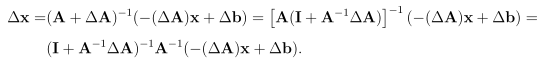 

Predpokladajme, že zmena (porucha/narušenie/šum) $\Delta\mathbf{A}$ je taká malá, že platí $\left\lVert\mathbf{A}^{-1}\Delta\mathbf{A}\right\rVert\le\left\lVert\mathbf{A}^{-1}\right\rVert\cdot\left\lVert\Delta\mathbf{A}\right\rVert<1$. Aplikovaním Tvrdenia 4 postupne dostaneme 

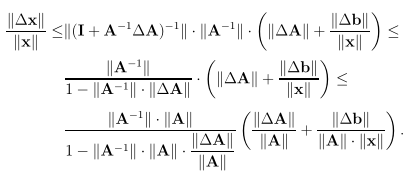 

Celkvo teda máme 

\begin{align*}\label{ineq:CondAnalysis1} \tag{23}
\dfrac{\lVert\Delta\mathbf{x}\rVert}{\lVert\mathbf{x}\rVert}\le\dfrac{\kappa(\mathbf{A})}{1-\kappa(\mathbf{A})\dfrac{\lVert\Delta\mathbf{A}\rVert}{\lVert\mathbf{A}\rVert}}\left(\dfrac{\lVert\Delta\mathbf{A}\rVert}{\lVert\mathbf{A}\rVert}+\dfrac{\lVert\Delta\mathbf{b}\rVert}{\lVert\mathbf{b}\rVert}\right). 
\end{align*} 

Číslo podmienenosti $\kappa(\mathbf{A})>1$ teda pôsobí ako "zosilovač" relatívnych chýb $\dfrac{\lVert\Delta\mathbf{A}\rVert}{\lVert\mathbf{A}\rVert}$ a $\dfrac{\lVert\Delta\mathbf{b}\rVert}{\lVert\mathbf{b}\rVert}$. Pre $\Delta\mathbf{A}=\mathbf{O}$ dostaneme zo vzťahu \eqref{ineq:CondAnalysis1} nasledovné 

\begin{align*}\label{ineq:CondAnalysis2} \tag{24}
\dfrac{\lVert\Delta\mathbf{x}\rVert}{\lVert\mathbf{x}\rVert}\le\kappa(\mathbf{A})\dfrac{\lVert\Delta\mathbf{b}\rVert}{\lVert\mathbf{b}\rVert}=\kappa(\mathbf{A})\dfrac{\lVert\mathbf{r}\rVert}{\lVert\mathbf{b}\rVert}, 
\end{align*}

kde $\mathbf{r}=\mathbf{b}-\mathbf{A}(\tilde{\mathbf{x}})$ je reziduum ($\Delta\mathbf{b}=\mathbf{A}\tilde{\mathbf{x}}-\mathbf{b}=-\mathbf{r}$, takže $\lVert\Delta\mathbf{b}\rVert=\lVert\mathbf{r}\rVert$). Nerovnosť \eqref{ineq:CondAnalysis2} potvrdzuje skúsenosť z Príkladu 7. Konkrétne ide o to, že malé reziduum nezaručuje malú chybu (v riešení). Na pravej strane nerovnosti \eqref{ineq:CondAnalysis2} je totiž norma rezidua $\lVert\mathbf{r}\rVert$ vynásobená číslom podmienenosti $\kappa(\mathbf{A})$ matice $\mathbf{A}$, takže i keď je reziduum malé, napriek tomu môže byť relatívna chyba riešenia veľká, pokiaľ je $\kappa(\mathbf{A})$ veľké. 


--- 

#### <font color=blue> Príklad 8 </font>  

Uvažujme SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$, kde 

$$\mathbf{A}=\begin{pmatrix}1&10\\10&101\end{pmatrix}, \quad \mathbf{b}=\begin{pmatrix}11\\111\end{pmatrix}, \quad \text{má riešenie} \quad \mathbf{x}=\begin{pmatrix}1\\1\end{pmatrix}.$$

Použijeme $\ell_{\infty}$-normu a určíme $\lVert\mathbf{b}\rVert_{\infty}=111$, $\lVert\mathbf{x}\rVert_{\infty}=1$. Keď pravú stranu zmeníme na 

$$\tilde{\mathbf{b}}=\begin{pmatrix}11.11\\110.89\end{pmatrix}, \quad \text{dostaneme riešenie} \quad \tilde{\mathbf{x}}=\begin{pmatrix}13.21\\-0.21\end{pmatrix}.$$

Označme $\Delta\mathbf{b}=\tilde{\mathbf{b}}-\mathbf{b}$, $\Delta\mathbf{x}=\tilde{\mathbf{x}}-\mathbf{x}$, potom $\lVert\Delta\mathbf{b}\rVert_{\infty}=0.11$ a $\lVert\Delta\mathbf{x}\rVert_{\infty}=12.21$. Vidíme, že pomerne malá zmena pravej strany zásadne zmenila riešenie. Relatívne zmeny sú takéto: 

$$\dfrac{\lVert\Delta\mathbf{b}\rVert_{\infty}}{\lVert\mathbf{b}\rVert_{\infty}}=9.\overline{909}\times10^{-4}, \quad \dfrac{\lVert\Delta\mathbf{x}\rVert_{\infty}}{\lVert\mathbf{x}\rVert_{\infty}}=12.21.$$

Podľa $(24)$ odhadneme 

$$\kappa_{\infty}(\mathbf{A})\ge\dfrac{12.21}{9.\overline{909}\times10^{-4}}=12321.$$

V skutočnosti sú $\mathbf{b}$ a $\Delta\mathbf{b}$ zvolené tak, že $\kappa_{\infty}(\mathbf{A})=12321$. To sa jednoducho overí, lebo 

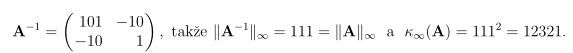 

Ukážeme ešte, že vzťah $(24)$ platí ako rovnosť 

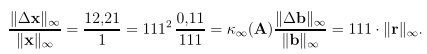 

---

---

#### Poznámka 16 

K určeniu $\kappa(\mathbf{A})$ je potrebné poznať $\left\lVert\mathbf{A}^{-1}\right\rVert$, pričom ale výpočet $\mathbf{A}^{-1}$ vyžaduje približne trikrát toľko práce ako riešenie celej SLR. Presná hodnota $\kappa(\mathbf{A})$ však väčšinou nie je nevyhnutná a postačuje jej rozumná aproximácia. Takéto spoľahlivé a dostatočne presné aproximácie je možné získať pomocou rôznych výpočtových balíkov zameraných na riešenie SLR resp. lineárnu algebru. Ak program zistí, že číslo podmienenosti je príliš veľké, tak vypíše varovanie alebo dokonca preruší výpočet.  

--- 

---

#### Poznámka 17 

* **SLR je dobre (zle) podmienená práve vtedy, keď je matica tejto sústavy dobre (zle) podmienená.** Podmienenosť matice sústavy $\mathbf{A}$ sa meria za pomoci čísla podmienenosti $\kappa(\mathbf{A})$. Ak je číslo $\kappa(\mathbf{A})$ malé (veľké), matica $\mathbf{A}$ je dobre (zle) podmienená. Zle podmienenú sústavu rovníc je zvyčajne veľmi obtiažne riešiť. Pomôcť môže výpočet s viacmiestnou mantisou (je vhodné použiť dvojnásobnú alebo ešte väčšiu presnosť). Existujú však aj výnimky: Ak je napr. $\mathbf{A}$ diagonálna matica, v ktorej $a_{ii}=10^i$, potom je $\kappa(\mathbf{A})=10^{n-1}$, čo je pre veľké $n$ veľké číslo, no napriek tomu riešenie $x_i=10^{-i}b_i$ získame bez problémov pre ľubovoľne veľký počet rovníc. 


* Predpokladajme, že matica sústavy je dobre podmienená. Potom je GEM s čiastočným (alebo s úplným) výberom hlavných prvkov stabilný algoritmus: Keďže veľkosť multiplikátorov nepresahuje hodnotu $1$, vznikajúce zaokrúhľovacie chyby sa ďalším výpočtom "nezosiľujú" resp. nenarastajú. Na druhej strane, ak sa nerealizuje výber hlavných prvkov, môžu vzniknúť multiplikátory, ktorých absolútna hodnota je väčšia ako $1$, čo má za následok zväčšovanie zaokrúhľovacích chýb vzniknutých už v predošlých krokoch. GEM bez výberu hlavných prvkov je teda vo všeobecnosti nestabilný algoritmus. Výnimku tvoria prípady so špeciálnou  maticou sústavy - napr. keď je matica sústavy ostro diagonálne dominantná alebo p.d., potom je i GEM bez výberu pivotov stabilný algoritmus. 

--- 

--- 

#### <font color=blue> Príklad 9 </font>  

V tomto príklade budeme ilustrovať výpočet noriem a čísla podmienenosti v Python-e. 

In [49]:
# definujeme vektor a
a = np.arange(9) - 4 
print('a = ')
print(a)
print('')
# definujeme maticu A 
A = a.reshape((3, 3)) 
print('A = ')
print(A)
print('')

# rozne vektorove normy 
print(np.linalg.norm(a, 1))
print(np.linalg.norm(a, 2))
print(np.linalg.norm(a, np.inf))
print('')

# rozne maticove normy 
print(np.linalg.norm(A, 1))
print(np.linalg.norm(A, 2))
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(A, 'fro'))

a = 
[-4 -3 -2 -1  0  1  2  3  4]

A = 
[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]

20.0
7.745966692414834
4.0

7.0
7.3484692283495345
9.0
7.745966692414834


In [61]:
# vygenerujeme nahodnu maticu C s celociselnymi prvkami z intervalu <-10,10> 
C = np.random.randint(-10, 10, size=(3, 3)) 
print('C = ')
print(C) 
print('')

# cislo podmienenosti matice C 
# 1. pristup 
print(np.linalg.norm(C)*np.linalg.norm(np.linalg.inv(C))) 
# 2. pristup 
print(np.linalg.cond(C, p='fro'))
# ina norma ako Frobeniova 
print(np.linalg.norm(C,2)*np.linalg.norm(np.linalg.inv(C),2)) 

C = 
[[  7  -9  -8]
 [ -2  -3   5]
 [  2 -10   7]]

16.872362124881732
16.872362124881732
12.84744472120616


--- 

<font color=purple> EXTRA: Za efektívny interaktívny kód implementujúci GEM s čiastočným výberom pivota je možné získať dva bonusové body. Po spustení kódu by mal mať používateľ možnosť odkrokovať riešenie SLR s tým, že sa mu jednotlivé kroky a medzivýsledky budú priebežne zobrazovať. Nezabudnite ošetriť prípadné výnimky resp. kritické situácie, ktoré by mohli počas riešenia GEM nastať. </font> 

***
<a id=zdroje></a>
 # <font color=brown> Použité zdroje</font> 

* Ackleh, A.S., Allen, E.J., Kearfott, R.B., & Seshaiyer, P. (2009). Classical and Modern Numerical Analysis: Theory, Methods and Practice. Chapman and Hall/CRC. 


* Burden, R. L., & Faires, J. D. (2011). Numerical analysis. Brooks/Cole, Cengage Learning. 


* Čermák, L. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Fajmon, B., Hlavičková, I., Novák, M., Vítovec, J. (2014). Numerická matematika a pravděpodobnost. Ústav matematiky FEKT VUT v Brně. 


* Gezerlis, A. (2020). Numerical methods in physics with Python. Cambridge University Press. 


* Gilli, M., Maringer, D., Schumann, E. (2019). Numerical Methods and Optimization in Finance. Elsevier/Academic Press. 


* Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge University Press, USA.


* Kincaid, D., & Cheney, E. W. (2002). Numerical analysis: Mathematics of scientific computing. Pacific Grove, CA: Brooks/Cole.


* Kiseľák, J. (2020). Základy numerických metód. ÚMV PF UPJŠ. 


* Kong, Q., Siauw, T., Bayen, A. (2020). [Python Programming and Numerical Methods: A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). Academic Press. 


* Oršanský, P., Ftorek B. (2021). Štatistické a numerické metódy. EDIS - UNIZA.


* Růžičková, I. & Hlavička, R. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Sauer, T. (2011). Numerical Analysis. Addison-Wesley Publishing Company, USA. 


* Sullivan, E. (2020). Numerical Methods: An Inquiry-Based Approach With Python. Faculty Publications. 